<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Machine Learning Well-documented, Demonstration Python Workflows 

### Ensemble Trees, Bagging and Random Forest

#### Michael Pyrcz, Professor, The University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This is a tutorial for / demonstration of **Ensemble Trees, Bagging and Random Forest**. 

**YouTube Lecture**: check out my lectures on:

* [Introduction to Machine Learning](https://youtu.be/zOUM_AnI1DQ?si=wzWdJ35qJ9n8O6Bl)
* [Decision Tree](https://youtu.be/JUGo1Pu3QT4?si=ebQXv6Yglar0mYWp)
* [Random Forest](https://youtu.be/m5_wk310fho?si=up-mzVPHvniXsYE6)
* [Gradient Boosting](https://youtu.be/___T8_ixIwc?si=ozHR_eIuMF3SPTxJ)

These lectures are all part of my [Machine Learning Course](https://youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&si=XonjO2wHdXffMpeI) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivations for Ensemble Trees, Bagging and Random Forest

Decision tree are not the most powerful, cutting edge method in machine learning, but,
* one of the most understandable, interpretable predictive machine learning modeling
* decision trees are enhanced with random forests, bagging and boosting to be one of the best models in many cases

Now we cover ensemble trees, tree bagging and random forest building on decision trees. First I provide some concepts for decision trees and then for ensemble methods.

##### Decision Tree

**Prediction**

* estimate a function $\hat{f}$ such that we predict a response feature $Y$ from a set of predictor features $X_1,\ldots,X_m$. 

* the prediction is of the form $\hat{Y} = \hat{f}(X_1,\ldots,X_m)$ 

**Suppervised Learning**

* the response feature label, $Y$, is available over the training and testing data
    
**Based on an Ensemble of Decision Trees**    
    
These are the concepts related to decision tree.    
   
**Hiearchical, Binary Segmentation of the Feature Space**

The fundamental idea is to divide the predictor space, $𝑋_1,\ldots,X_m$, into $J$ mutually exclusive, exhaustive regions

* **mutually exclusive** – any combination of predictors only belongs to a single region, $R_j$

* **exhaustive** – all combinations of predictors belong a region, $R_j$, regions cover entire feature space (range of the variables being considered)

For every observation in a region, $R_j$, we use the same prediction, $\hat{Y}(R_j)$    

For example predict production, $\hat{Y}$, from porosity, ${X_1}$

* given the data within a mD feature space, $X_1,\ldots,X_m$, find that boundary maximizes the gap between the two categories

* new cases are classified based on where they fall relative to this boundary 
 
**Proceedure for Tree Construction**

The tree is constructed from the top down.  We begin with a sigle region that covers the entire feature space and then proceed with a sequence of splits.

* **Scan All Possible Splits** over all regions and over all features.

* **Greedy Optimization**  The method proceeds by finding the first segmentation (split) in any feature that minimizes the residual sum of squares of errors over all the training data $y_i$ over all of the regions $j = 1,\ldots,J$.

$$
RSS = \sum^{J}_{j=1} \sum_{i \in R_j} (y_i - \hat{y}_{R_j})^2
$$

* **Stopping Criteria** is typically based on minimum number of training data in each region for a robust estimation and / or minimum reduction in RSS for the next split 

##### Esemble Methods

Model testing accuracy is reduced by model variance.  Model variance may be reduced through averaging multiple good estimates.

Recall that variance is reduced by averaging given independent, identically distributed sampling as predicted by standard error as:

$$
\sigma_{\bar{x}}^2 = \frac{\sigma^2_s}{n}
$$

Therefore, we can reduce model variance through the utilization of an ensemble of models.

$$
\hat{f}_{avg}(X_1,...,X_m) = \frac{1}{B} \sum_{b=1}^{B} \hat{f}^b(X_1,...,X_m)
$$

This method works well with trees and is applied with the **tree bagging** and **random forest** prediction methods.

* the trees are allowed to grow deep and complicated (are not pruned)

* each of the individual models, $\hat{f}_{avg}(X_1,...,X_m)$, are complicated resulting in low model bias, but high model variance

* the averaging over the ensemble of models will then mitigate this high model variance

Therefore, overfit is not an issue as it is for decision trees.   

##### Tree Bagging

To build the ensemble of models we need multiple training datasets.  This is typically not available.

* the solution is to **bootstrap** the entire dataset to build multiple bootstrap realizations of training data, $X_1^b,...,X_m^b$

* a deep decision tree is fit to each realization of the training data, $\hat{f}^b(X_1^b,...,X_m^b)$

* a prediction estimate is calculated by each tree in the ensemble $Y^b =\hat{f}^b(X_1^b,...,X_m^b)$

* for **regression** the ensemble prediction is the average of the prediction from each member of the ensemble, $Y = \frac{1}{B} \sum_{b=1}^{B} Y^b$

* for **classification** the ensemble prediction is the majority-rule of the ensemble classifications, $Y = argmax_k(Y^b_k)$

**Out-of-Bag**

With bootstrap resampling of the data, it can be shown that about 2/3 of the data will be included (in expectation) for each tree.  

* therefore are 1/3 of the data (in expectation) unused in predicting each tree, these are know as out-of-bag observations

* for every response feature observation, $y_{\alpha}$,  there will be $\frac{B}{3}$ out-of-bag predictions, $y^{*,b}_{\alpha}$

* we can average (for regression) these prediction to calculate a single out-of-bag prediction, $y^{*}_{\alpha} = \sum_{\alpha = 1}^{\frac{B}{3}} y^{*,b}_{\alpha}$

* we then calculate the out-of-bag mean square error (MSE)

$$
MSE_{OOB} = \sum_{\alpha = 1}^{\frac{B}{3}} \left[ y^{*}_{\alpha} - y_{\alpha} \right]^2
$$

**Interpretability**

Compared to decision trees, the ensemble methods have reduced interpretability.  One tool to improve model interpretability is feature importance.

We calculate variable importance through calculating the average of:

* residual sum of square reduction for all splits involving each predictor feature for regression

* the decrease in the Gini index for all splits involving each predictor feature for classification

Both are standardized to sum to 1.0 over the features.

##### Random Forest

One issue with tree bagging is the trees in the ensemble may be highly correlated.

* this occurs when there is a dominant predictor feature as it will always be applied to the top split(s), the result is all the trees in the ensemble are very similar (i.e. correlated)

* with highly correlated trees, there is significantly less reduction in model variance with the ensemble

* with random forest, for each split only $\sqrt{m}$ (or some other reduced set) of predictor features are candidates (selected at random)

* this forces each tree in the ensemble to evolve in disimilar manner 

#### Load the required libraries

We will also need some standard packages. These should have been installed with Anaconda 3.

In [3]:
%matplotlib inline                                         
supress_warnings = True
import os                                                     # to set current working directory 
import math                                                   # square root operator
import numpy as np                                            # arrays and matrix math
import scipy.stats as st                                      # statistical methods
import pandas as pd                                           # DataFrames
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator,AutoMinorLocator,FuncFormatter) # control of axes ticks
from matplotlib.colors import ListedColormap                  # custom color maps
import seaborn as sns                                         # for matrix scatter plots
from sklearn.tree import DecisionTreeRegressor                # decision tree method
from sklearn.ensemble import BaggingRegressor                 # bagging tree method
from sklearn.ensemble import RandomForestRegressor            # random forest method
from sklearn.tree import _tree                                # for accessing tree information
from sklearn import metrics                                   # measures to check our models
from sklearn.preprocessing import StandardScaler              # standardize the features
from sklearn.tree import export_graphviz                      # graphical visualization of trees
from sklearn.model_selection import (cross_val_score,train_test_split,GridSearchCV,KFold) # model tuning
from sklearn.pipeline import (Pipeline,make_pipeline)         # machine learning modeling pipeline
from sklearn import metrics                                   # measures to check our models
from sklearn.model_selection import cross_val_score           # multi-processor K-fold crossvalidation
from sklearn.model_selection import train_test_split          # train and test split
from IPython.display import display, HTML                     # custom displays
cmap = plt.cm.inferno                                         # default color bar, no bias and friendly for color vision defeciency
plt.rc('axes', axisbelow=True)                                # grid behind plotting elements
if supress_warnings == True:  
    import warnings                                           # supress any warnings for this demonstration
    warnings.filterwarnings('ignore') 
seed = 13                                                     # random number seed for workflow repeatability

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare functions

Let's define a couple of functions to streamline plotting correlation matrices and visualization of a decision, boosting tree and random forest regression model. 

In [5]:
def comma_format(x, pos):
    return f'{int(x):,}'

def feature_rank_plot(pred,metric,mmin,mmax,nominal,title,ylabel,mask): # feature ranking plot
    mpred = len(pred); mask_low = nominal-mask*(nominal-mmin); mask_high = nominal+mask*(mmax-nominal); m = len(pred) + 1
    plt.plot(pred,metric,color='black',zorder=20)
    plt.scatter(pred,metric,marker='o',s=10,color='black',zorder=100)
    plt.plot([-0.5,m-1.5],[0.0,0.0],'r--',linewidth = 1.0,zorder=1)
    plt.fill_between(np.arange(0,mpred,1),np.zeros(mpred),metric,where=(metric < nominal),interpolate=True,color='dodgerblue',alpha=0.3)
    plt.fill_between(np.arange(0,mpred,1),np.zeros(mpred),metric,where=(metric > nominal),interpolate=True,color='lightcoral',alpha=0.3)
    plt.fill_between(np.arange(0,mpred,1),np.full(mpred,mask_low),metric,where=(metric < mask_low),interpolate=True,color='blue',alpha=0.8,zorder=10)
    plt.fill_between(np.arange(0,mpred,1),np.full(mpred,mask_high),metric,where=(metric > mask_high),interpolate=True,color='red',alpha=0.8,zorder=10)  
    plt.xlabel('Predictor Features'); plt.ylabel(ylabel); plt.title(title)
    plt.ylim(mmin,mmax); plt.xlim([-0.5,m-1.5]); add_grid();
    return

def plot_corr(corr_matrix,title,limits,mask):                 # plots a graphical correlation matrix 
    my_colormap = plt.get_cmap('RdBu_r', 256)          
    newcolors = my_colormap(np.linspace(0, 1, 256))
    white = np.array([256/256, 256/256, 256/256, 1])
    white_low = int(128 - mask*128); white_high = int(128+mask*128)
    newcolors[white_low:white_high, :] = white                # mask all correlations less than abs(0.8)
    newcmp = ListedColormap(newcolors)
    m = corr_matrix.shape[0]
    im = plt.matshow(corr_matrix,fignum=0,vmin = -1.0*limits, vmax = limits,cmap = newcmp)
    plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns); ax = plt.gca()
    ax.xaxis.set_label_position('bottom'); ax.xaxis.tick_bottom()
    plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    plt.colorbar(im, orientation = 'vertical')
    plt.title(title)
    for i in range(0,m):
        plt.plot([i-0.5,i-0.5],[-0.5,m-0.5],color='black')
        plt.plot([-0.5,m-0.5],[i-0.5,i-0.5],color='black')
    plt.ylim([-0.5,m-0.5]); plt.xlim([-0.5,m-0.5])
    
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   
    
def visualize_model(model,xfeature,x_min,x_max,yfeature,y_min,y_max,response,z_min,z_max,clabel,xlabel,ylabel,title):# plots the data points and model 
    xplot_step = (x_max - x_min)/300.0; yplot_step = (y_max - y_min)/300.0 # resolution of the model visualization
    xx, yy = np.meshgrid(np.arange(x_min, x_max, xplot_step), # set up the mesh
                     np.arange(y_min, y_max, yplot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])          # predict with our trained model over the mesh
    Z = Z.reshape(xx.shape)
    im = plt.imshow(Z,interpolation = None,aspect = "auto",extent = [x_min,x_max,y_min,y_max], vmin = z_min, vmax = z_max,cmap = cmap)
    if (type(xfeature) != str) & (type(yfeature) != str):
        plt.scatter(xfeature,yfeature,s=None, c=response, marker=None, cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=1.0, 
                    linewidths=0.6, edgecolors="white")
        plt.xlabel(xlabel); plt.ylabel(ylabel)
    else:
        plt.xlabel(xlabel); plt.ylabel(ylabel)
    plt.title(title)                                          # add the labels
    plt.xlim([x_min,x_max]); plt.ylim([y_min,y_max])
    cbar = plt.colorbar(im, orientation = 'vertical')         # add the color bar
    cbar.set_label(clabel, rotation=270, labelpad=20)
    cbar.ax.yaxis.set_major_formatter(FuncFormatter(comma_format))
    return Z
    
def visualize_grid(Z,xfeature,x_min,x_max,yfeature,y_min,y_max,response,z_min,z_max,clabel,xlabel,ylabel,title,):# plots the data points and the decision tree  
    n_classes = 10
    xplot_step = (x_max - x_min)/300.0; yplot_step = (y_max - y_min)/300.0 # resolution of the model visualization
    xx, yy = np.meshgrid(np.arange(x_min, x_max, xplot_step),
                     np.arange(y_min, y_max, yplot_step))
    cs = plt.contourf(xx, yy, Z, cmap=cmap,vmin=z_min, vmax=z_max, levels=np.linspace(z_min, z_max, 100))

    im = plt.scatter(xfeature,yfeature,s=None,c=response,marker=None,cmap=cmap,norm=None,vmin=z_min,vmax=z_max,alpha=1.0, 
                     linewidths=0.6, edgecolors="white")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    cbar = plt.colorbar(im, orientation = 'vertical')
    cbar.set_label(clabel, rotation=270, labelpad=20)
    cbar.ax.yaxis.set_major_formatter(FuncFormatter(comma_format))
    
def check_model(model,y,ymin,ymax,ylabel,title): # get OOB MSE and cross plot a decision tree 
    oob_indices = np.setdiff1d(np.arange(len(y)), model.estimators_samples_)
    oob_y_hat = model.oob_prediction_[oob_indices]
    oob_y = y.values[oob_indices]
    MSE_oob = metrics.mean_squared_error(oob_y,oob_y_hat)
    plt.scatter(oob_y,oob_y_hat,s=None, c='darkorange',marker=None,cmap=cmap,norm=None,vmin=None,vmax=None,alpha=0.8, 
                linewidths=1.0, edgecolors="black")
    plt.title(title); plt.xlabel('Truth: ' + str(ylabel)); plt.ylabel('Estimated: ' + str(ylabel))
    plt.xlim(ymin,ymax); plt.ylim(ymin,ymax)
    plt.plot([ymin,ymax],[ymin,ymax],color='black'); add_grid()
    plt.annotate('Out of Bag MSE: ' + str(f'{(np.round(MSE_oob,2)):,.0f}'),[4500,2500])
    plt.gca().xaxis.set_major_formatter(FuncFormatter(comma_format))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))

def check_model_OOB_MSE(model,y,ymin,ymax,ylabel,title):      # OOB MSE and cross plot over multiple bagged trees, checks for unestimated 
    oob_y_hat = model.oob_prediction_
    oob_y = y[oob_y_hat > 0.0]; oob_y_hat = oob_y_hat[oob_y_hat > 0.0]; 
    MSE_oob = metrics.mean_squared_error(oob_y,oob_y_hat)
    plt.scatter(oob_y,oob_y_hat,s=None, c='darkorange',marker=None,cmap=cmap,norm=None,vmin=None,vmax=None,alpha=0.8, 
                linewidths=1.0, edgecolors="black")
    plt.title(title); plt.xlabel('Truth: ' + str(ylabel)); plt.ylabel('Estimated: ' + str(ylabel))
    plt.xlim(ymin,ymax); plt.ylim(ymin,ymax)
    plt.plot([ymin,ymax],[ymin,ymax],color='black'); add_grid()
    plt.annotate('Out of Bag MSE: ' + str(f'{(np.round(MSE_oob,2)):,.0f}'),[4500,2500])
    plt.gca().xaxis.set_major_formatter(FuncFormatter(comma_format))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))
    
def check_grid(grid,xmin,xmax,ymin,ymax,xfeature,yfeature,response,zmin,zmax,title): # plots the estimated vs. the actual  
    if grid.ndim != 2:
        raise ValueError("Prediction array must be 2D")
    ny, nx = grid.shape
    xstep = (xmax - xmin)/nx; ystep = (ymax-ymin)/ny 
    predict_train = feature_sample(grid, xmin, ymin, xstep, ystep, xfeature, yfeature, 'sample')
    MSE = metrics.mean_squared_error(response,predict_train)
    plt.scatter(response,predict_train,s=None, c='darkorange',marker=None,cmap=cmap,norm=None,vmin=None,vmax=None,alpha=0.8, 
                linewidths=1.0, edgecolors="black")
    plt.title(title); plt.xlabel('Truth: ' + str(ylabel)); plt.ylabel('Estimated: ' + str(ylabel))
    plt.xlim(zmin,zmax); plt.ylim(zmin,zmax)
    plt.plot([zmin,zmax],[zmin,zmax],color='black'); add_grid()
    plt.gca().xaxis.set_major_formatter(FuncFormatter(comma_format))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))
    # plt.annotate('Out of Bag MSE: ' + str(f'{(np.round(MSE_oob,2)):,.0f}'),[4500,2500]) # not technically OOB MSE

def feature_sample(array, xmin, ymin, xstep, ystep, df_x, df_y, name): # sampling predictions from a feature space grid 
    if array.ndim != 2:
        raise ValueError("Array must be 2D")
    if len(df_x) != len(df_y):
        raise ValueError("x and y feature arrays must have equal lengths")   
    ny, nx = array.shape
    df = pd.DataFrame()
    v = []
    nsamp = len(df_x)
    for isamp in range(nsamp):
        x = df_x.iloc[isamp]
        y = df_y.iloc[isamp]
        iy = min(ny - int((y - ymin) / ystep) - 1, ny - 1)
        ix = min(int((x - xmin) / xstep), nx - 1)
        v.append(array[iy, ix])
    df[name] = v
    return df    

def display_sidebyside(*args):                                # display DataFrames side-by-side (ChatGPT 4.0 generated Spet, 2024)
    html_str = ''
    for df in args:
        html_str += df.head().to_html()  # Using .head() for the first few rows
    display(HTML(f'<div style="display: flex;">{html_str}</div>'))

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).


In [7]:
#os.chdir("c:/PGE383")                                        # set the working directory

You will have to update the part in quotes with your own working directory and the format is different on a Mac (e.g. "~/PGE").  

#### Loading Data

Let's load the provided multivariate, spatial dataset [unconv_MV.csv](https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV.csv) available in my GeoDataSet repo. It is a comma delimited file with: 

* well index (integer)
* porosity (%)
* permeability ($mD$)
* acoustic impedance ($\frac{kg}{m^3} \cdot \frac{m}{s} \cdot 10^6$).
* brittleness (%)
* total organic carbon (%)
* vitrinite reflectance (%)
* initial gas production (90 day average) (MCFPD)

We load it with the pandas 'read_csv' function into a data frame we called 'df' and then preview it to make sure it loaded correctly.

**Python Tip: using functions from a package** just type the label for the package that we declared at the beginning:

```python
import pandas as pd
```

so we can access the pandas function 'read_csv' with the command: 

```python
pd.read_csv()
```

but read csv has required input parameters. The essential one is the name of the file. For our circumstance all the other default parameters are fine. If you want to see all the possible parameters for this function, just go to the docs [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).  

* The docs are always helpful
* There is often a lot of flexibility for Python functions, possible through using various inputs parameters

also, the program has an output, a pandas DataFrame loaded from the data.  So we have to specficy the name / variable representing that new object.

```python
df = pd.read_csv("unconv_MV.csv")  
```

Let's run this command to load the data and then this command to extract a random subset of the data.

```python
df = df.sample(frac=.30, random_state = 73073); 
df = df.reset_index()
```

#### Feature Engineering

Let's make some changes to the data to improve the workflow:

* **Select the predictor features (x2) and the response feature (x1)**, make sure the metadata is also consistent.
* **Metadata** encoding such as the units, labels and display ranges for each feature.
* **Reduce the number of data** for ease of visualization (hard to see if too many points on our plots).
* **Train and test data split** to demonstrate and visualize simple hyperparameter tuning.
* **Add random noise to the data** to demonstrate model overfit. The original data is error free and does not readily demonstrate overfit.

Given this is properly set, one should be able to use any dataset and features for this demonstration. 

* for brevity we don't show any feature selection here. Previous chapter, e.g., k-nearest neighbours include some feature selection methods, but see the feature selection chapter for many possible methods with codes for feature selection.

#### Optional: Add Random Noise to the Response Feature

We can do this to observe the impact of data noise on overfit and hyperparameter tuning.

* This is for experiential learning, of course we wouldn't add random noise to our data
* We set the random number seed for reproducibility 

In [9]:
add_error = True                                              # add random error to the response feature
std_error = 500                                               # standard deviation of random error, for demonstration only
idata = 2

if idata == 1:
    df_load = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV.csv") # load the data from my github repo
    df_load = df_load.sample(frac=.30, random_state = seed); df_load = df_load.reset_index() # extract 30% random to reduce the number of data
    
elif idata == 2:
    df_load = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v5.csv") # load the data 
    df_load = df_load.sample(frac=.70, random_state = seed); df_load = df_load.reset_index() # extract 30% random to reduce the number of data
    df_load = df_load.rename(columns={"Prod": "Production"})
    
yname = 'Production'; Xname = ['Por','Brittle']               # specify the predictor features (x2) and response feature (x1)
Xmin = [5.0,0.0]; Xmax = [25.0,100.0]                         # set minumums and maximums for visualization 
ymin = 1500.0; ymax = 7000.0
Xlabel = ['Porosity','Brittleness']; ylabel = 'Production'    # specify the feature labels for plotting
Xunit = ['%','%']; yunit = 'MCFPD'
Xlabelunit = [Xlabel[0] + ' (' + Xunit[0] + ')',Xlabel[1] + ' (' + Xunit[1] + ')']
ylabelunit = ylabel + ' (' + yunit + ')'

if add_error == True:                                         # method to add error
    np.random.seed(seed=seed)                                 # set random number seed
    df_load[yname] = df_load[yname] + np.random.normal(loc = 0.0,scale=std_error,size=len(df_load)) # add noise
    values = df_load._get_numeric_data(); values[values < 0] = 0   # set negative to 0 in a shallow copy ndarray
    
y = pd.DataFrame(df_load[yname])                              # extract selected features as X and y DataFrames
X = df_load[Xname]
df = pd.concat([X,y],axis=1)                                  # make one DataFrame with both X and y (remove all other features)

Let's make sure that we have selected reasonable features to build a model
* the 2 predictor features are not colinear, as this would result in an unstable prediction model
* each of the features are related to the response feature, the predictor features inform the response 

#### Calculate the Correlation Matrix and Correlation with Response Ranking 

Let's start with correlation analysis. We can calculate and view the correlation matrix and correlation to the response features with these previously declared functions.
* correlation analysis is based on the assumption of linear relationships, but it is a good start

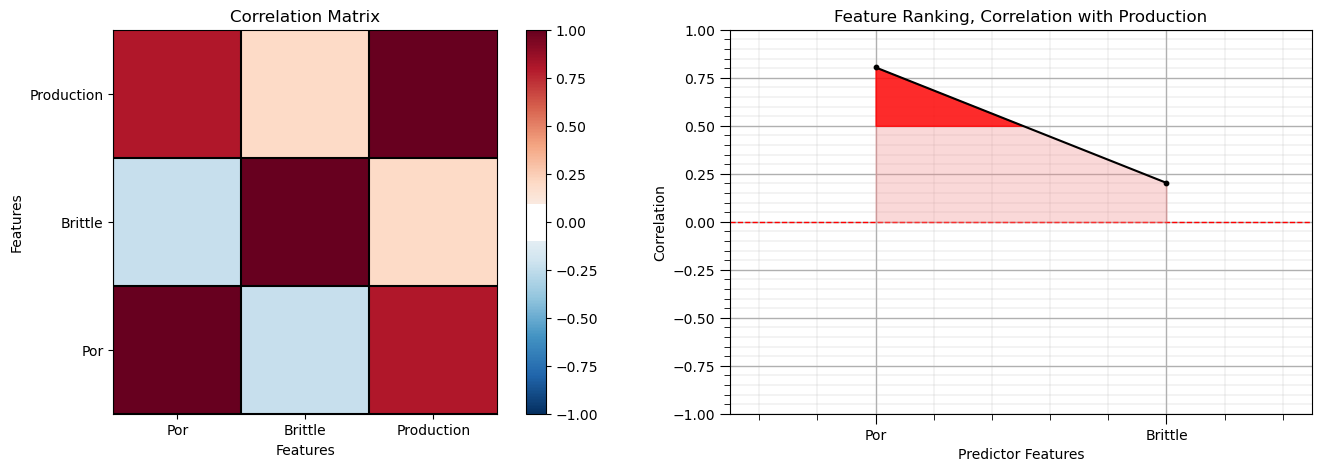

In [11]:
corr_matrix = df.corr()
correlation = corr_matrix.iloc[:,-1].values[:-1]

plt.subplot(121)
plot_corr(corr_matrix,'Correlation Matrix',1.0,0.1)           # using our correlation matrix visualization function
plt.xlabel('Features'); plt.ylabel('Features')

plt.subplot(122)
feature_rank_plot(Xname,correlation,-1.0,1.0,0.0,'Feature Ranking, Correlation with ' + yname,'Correlation',0.5)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.8, wspace=0.2, hspace=0.3); plt.show()

Note the 1.0 diagonal resulting from the correlation of each variable with themselves.  

This looks good.  There is a mix of correlation magnitudes. Of course, correlation coeffficients are limited to degree of linear correlations.  

* Let's look at the matrix scatter plot to see the pairwise relationship between the features.

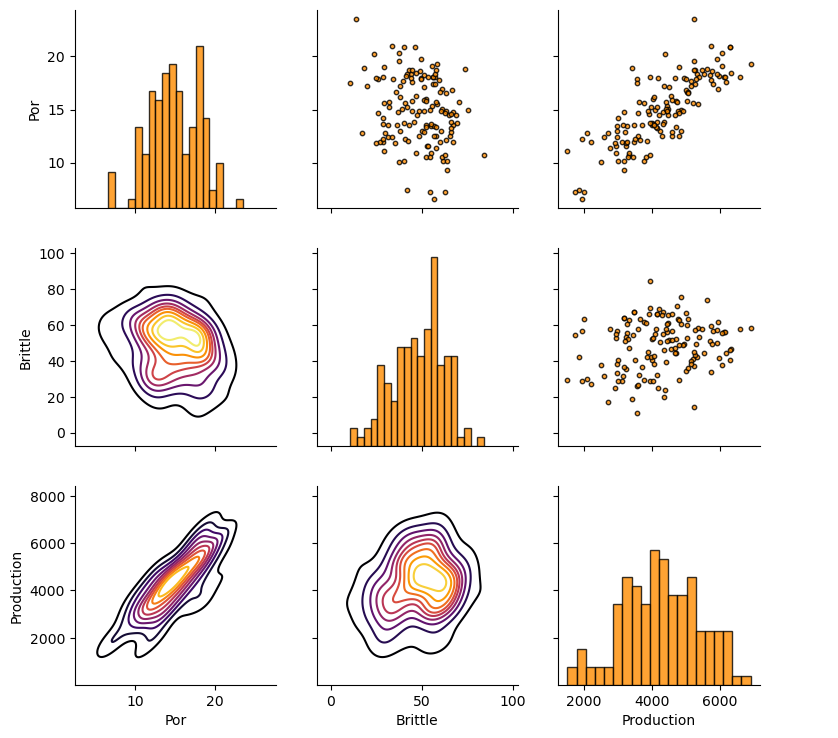

In [13]:
pairgrid = sns.PairGrid(df,vars=Xname+[yname])                # matrix scatter plots
pairgrid = pairgrid.map_upper(plt.scatter, color = 'darkorange', edgecolor = 'black', alpha = 0.8, s = 10)
pairgrid = pairgrid.map_diag(plt.hist, bins = 20, color = 'darkorange',alpha = 0.8, edgecolor = 'k')# Map a density plot to the lower triangle
pairgrid = pairgrid.map_lower(sns.kdeplot, cmap = plt.cm.inferno, 
                              alpha = 1.0, n_levels = 10)
pairgrid.add_legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.9, top=0.9, wspace=0.2, hspace=0.2); plt.show()

#### Train and Test Split

Since we are working with ensemble methods the train and test split is built into the model training with out-of-bag samples.

* we will work with the entire dataset
* note, we could split a testing dataset for the train, validate, test approach. For simplicity I only use train and test in these workflows.
  
#### Visualize the DataFrame

Visualizing the train and test DataFrame is useful check before we build our models.

* many things can go wrong, e.g., we loaded the wrong data, all the features did not load, etc.

We can preview by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). 

In [15]:
df.head(n=5)                                                  # check the loaded DataFrame

,Por,Brittle,Production
0,7.22,63.09,2006.074005
1,13.01,50.41,4244.321703
2,10.03,37.74,2493.189177
3,18.10,56.09,6124.075271
4,16.95,61.43,5951.336259


#### Summary Statistics for Tabular Data

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. 

* The describe command provides count, mean, minimum, maximum, percentiles in a nice data table. 

In [17]:
df.describe(percentiles=[0.1,0.9])                            # check DataFrame summary statistics

,Por,Brittle,Production
count,140.000000,140.000000,140.000000
mean,14.897357,48.345429,4273.644226
std,3.181639,14.157619,1138.466092
min,6.550000,10.940000,1517.373571
10%,10.866000,28.853000,2957.573690
50%,14.855000,50.735000,4315.186629
90%,18.723000,65.813000,5815.526968
max,23.550000,84.330000,6907.632261


It is good that we checked the summary statistics.

* there are no obvious issues
* check out the range of values for each feature to set up and adjust plotting limits. See above.

#### Visualize the Distributions

Let's check the histograms and scatter plots of the predictor features.

* check to make sure the data cover the range of possible predictor feature combinations
* check that the predictor features are not highly correlated, colinear, as this increases model variance

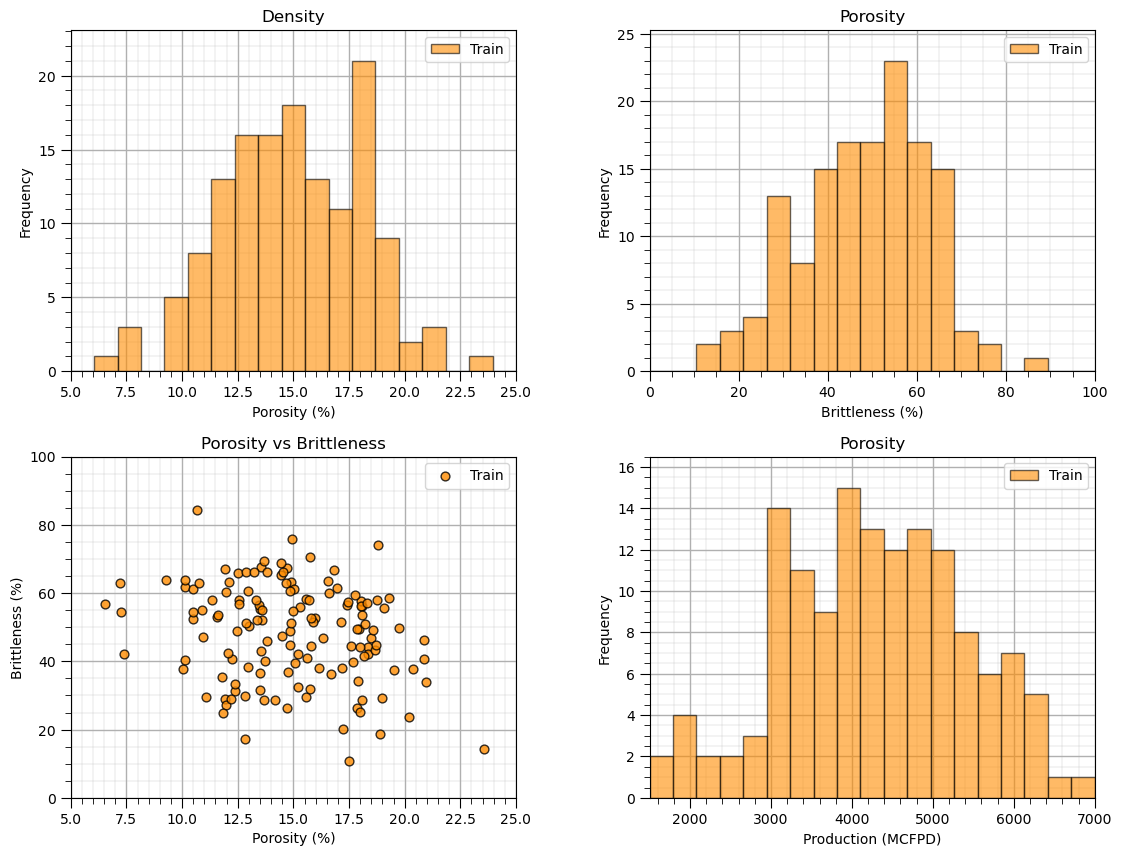

In [80]:
nbins = 20                                                    # number of histogram bins

plt.subplot(221)                                              # predictor feature #1 histogram
freq,_,_ = plt.hist(x=df[Xname[0]],weights=None,bins=np.linspace(Xmin[0],Xmax[0],nbins),alpha = 0.6,
                     edgecolor='black',color='darkorange',density=False,label='Train')
max_freq = max(freq)*1.10
plt.xlabel(Xlabelunit[0]); plt.ylabel('Frequency'); plt.ylim([0.0,max_freq]); plt.title('Density'); add_grid()  
plt.xlim([Xmin[0],Xmax[0]]); plt.legend(loc='upper right')   

plt.subplot(222)                                              # predictor feature #2 histogram
freq,_,_ = plt.hist(x=df[Xname[1]],weights=None,bins=np.linspace(Xmin[1],Xmax[1],nbins),alpha = 0.6,
                     edgecolor='black',color='darkorange',density=False,label='Train')
max_freq = max(freq)*1.10
plt.xlabel(Xlabelunit[1]); plt.ylabel('Frequency'); plt.ylim([0.0,max_freq]); plt.title('Porosity'); add_grid()  
plt.xlim([Xmin[1],Xmax[1]]); plt.legend(loc='upper right')   

plt.subplot(223)                                              # predictor features #1 and #2 scatter plot
plt.scatter(df[Xname[0]],df[Xname[1]],s=40,marker='o',color = 'darkorange',alpha = 0.8,edgecolor = 'black',zorder=10,label='Train')
plt.title(Xlabel[0] + ' vs ' +  Xlabel[1])
plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1])
plt.legend(); add_grid(); plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]])

plt.subplot(224)                                              # predictor feature #2 histogram
freq,_,_ = plt.hist(x=df[yname],weights=None,bins=np.linspace(ymin,ymax,nbins),alpha = 0.6,
                     edgecolor='black',color='darkorange',density=False,label='Train')
max_freq = max(freq)*1.10
plt.xlabel(ylabelunit); plt.ylabel('Frequency'); plt.ylim([0.0,max_freq]); plt.title('Porosity'); add_grid()  
plt.xlim([ymin,ymax]); plt.legend(loc='upper right') 

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.3, hspace=0.25)
#plt.savefig('Test.pdf', dpi=600, bbox_inches = 'tight',format='pdf')   
plt.show()

Once again, the distributions are well behaved, 

* we cannot observe obvious gaps nor truncations.
* the predictor features are not highly correlated

Let's look at a scatter plot of Porosity vs. Brittleness with points colored by Production.

* to visualize the prediction problem, i.e., the shape of the system

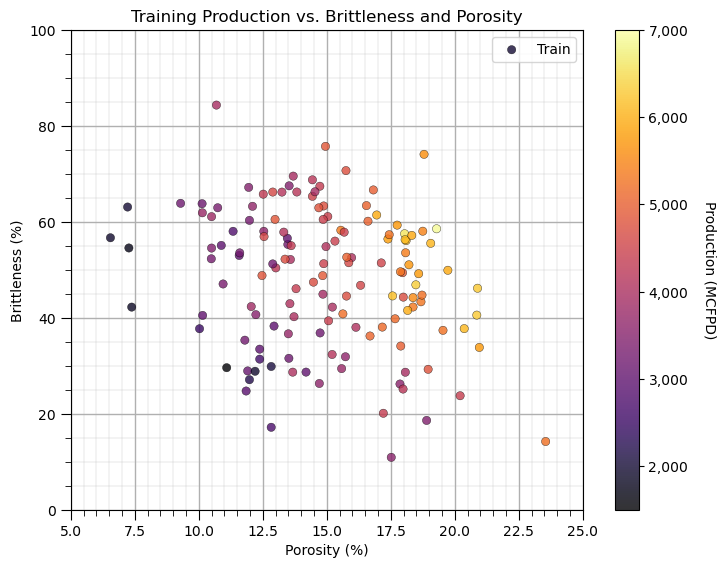

In [21]:
plt.subplot(111)                                              # visualize the train and test data in predictor feature space
im = plt.scatter(X[Xname[0]],X[Xname[1]],s=None, c=y[yname], marker='o', cmap=cmap, 
    norm=None, vmin=ymin, vmax=ymax, alpha=0.8, linewidths=0.3, edgecolors="black", label = 'Train')
plt.title('Training ' + ylabel + ' vs. ' + Xlabel[1] + ' and ' + Xlabel[0]); 
plt.xlabel(Xlabel[0] + ' (' + Xunit[0] + ')'); plt.ylabel(Xlabel[1] + ' (' + Xunit[1] + ')')
plt.xlim(Xmin[0],Xmax[0]); plt.ylim(Xmin[1],Xmax[1]); plt.legend(loc = 'upper right'); add_grid()
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label(ylabel + ' (' + yunit + ')', rotation=270, labelpad=20)
cbar.ax.yaxis.set_major_formatter(FuncFormatter(comma_format))
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Ensemble Tree Method - Tree Bagging Regression

We are ready to build a tree bagging model. To perform tree bagging we:

1. set the hyperparameters for the individual trees

```python
seed = 73073
max_depth = 100
min_samples_leaf = 2  
```

2. instantiate an individual regression tree

```python
regressor = DecisionTreeRegressor(max_depth = max_depth, min_samples_leaf = min_samples_leaf)
```

3. set the bagging hyperparameters

```python
num_trees = 100
seed = 73073
```

4. instantiate the bagging regressor with the previously instantiated regression tree (wrapping the decision tree)

```python
bagging_model = BaggingRegressor(base_estimator=regressor, n_estimators=num_trees, random_state=seed)
```

5. train the bagging regression (wrapping the decision tree)


```python
bagging_model.fit(X = predictors, y = response)
```

6. visualize the model result over the feature space (easy to do as we have only 2 predictor features)

#### Demonstration of Bagging by-Hand

For demonstration let's set the number of trees to 1 and run 6 bagging regressors.  

* the result for each is simply a complex decision tree
* note, the random_state parameter is the random number seed for the bootstrap in the bagging method
* the trees vary for each random number seed since the bootstrapped dataset will be different for each

We will loop over the models and store each of them in an list of models!

Completed of 6: 
1,  2,  3,  4,  5,  6,  

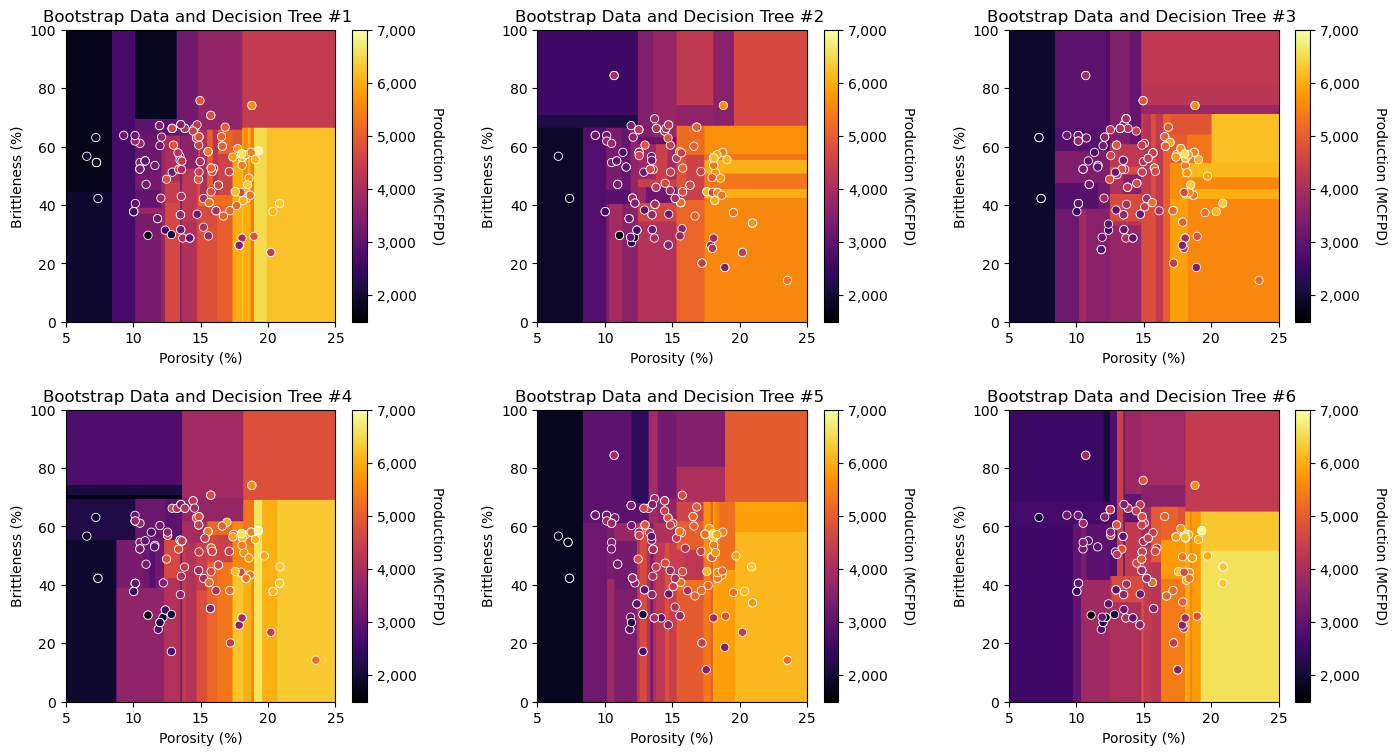

In [23]:
max_depth = 100; min_samples_leaf = 2                         # set for a complicated tree

regressor = DecisionTreeRegressor(max_depth = max_depth, min_samples_leaf = min_samples_leaf) # instantiate a decision tree

num_tree = 1                                                  # use only a single tree for this demonstration
seeds = [73073, 73074, 73075, 73076, 73077, 73078]
bagging_models = []; oob_MSE = []; score = []; pred = []

index = 1
print('Completed of 6: ')
for seed in seeds:                                            # visualize models over random number seeds
    bagging_models.append(BaggingRegressor(estimator=regressor,n_estimators=num_tree,random_state=seed,oob_score = True,
                                           bootstrap=True,n_jobs = 4))
    bagging_models[index-1].fit(X = X, y = y)
    oob_MSE.append(bagging_models[index-1].oob_score_)
    plt.subplot(2,3,index)
    bag_X1 = X.iloc[np.asarray(bagging_models[index-1].estimators_samples_[0]),0]
    bag_X2 = X.iloc[np.asarray(bagging_models[index-1].estimators_samples_[0]),1]
    bag_y = y.iloc[np.asarray(bagging_models[index-1].estimators_samples_[0]),0]
    pred.append(visualize_model(bagging_models[index-1],bag_X1,Xmin[0],Xmax[0],bag_X2,Xmin[1],Xmax[1],bag_y,ymin,ymax,
                ylabelunit,Xlabelunit[0],Xlabelunit[1],'Bootstrap Data and Decision Tree #' + str(index) + ' '))
    print(str(index)+ ', ', end =" ")
    index = index + 1
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.4, wspace=0.4, hspace=0.3)

Notice the data changes for each model,

* we have bootstrapped the dataset so some of the data are missing and others are used 2 or more times
* recall, in expectation, only 2/3 of the data are used for each tree, and 1/3 is out-of-bag

Let's check the cross validation results with the out-of-bag data.

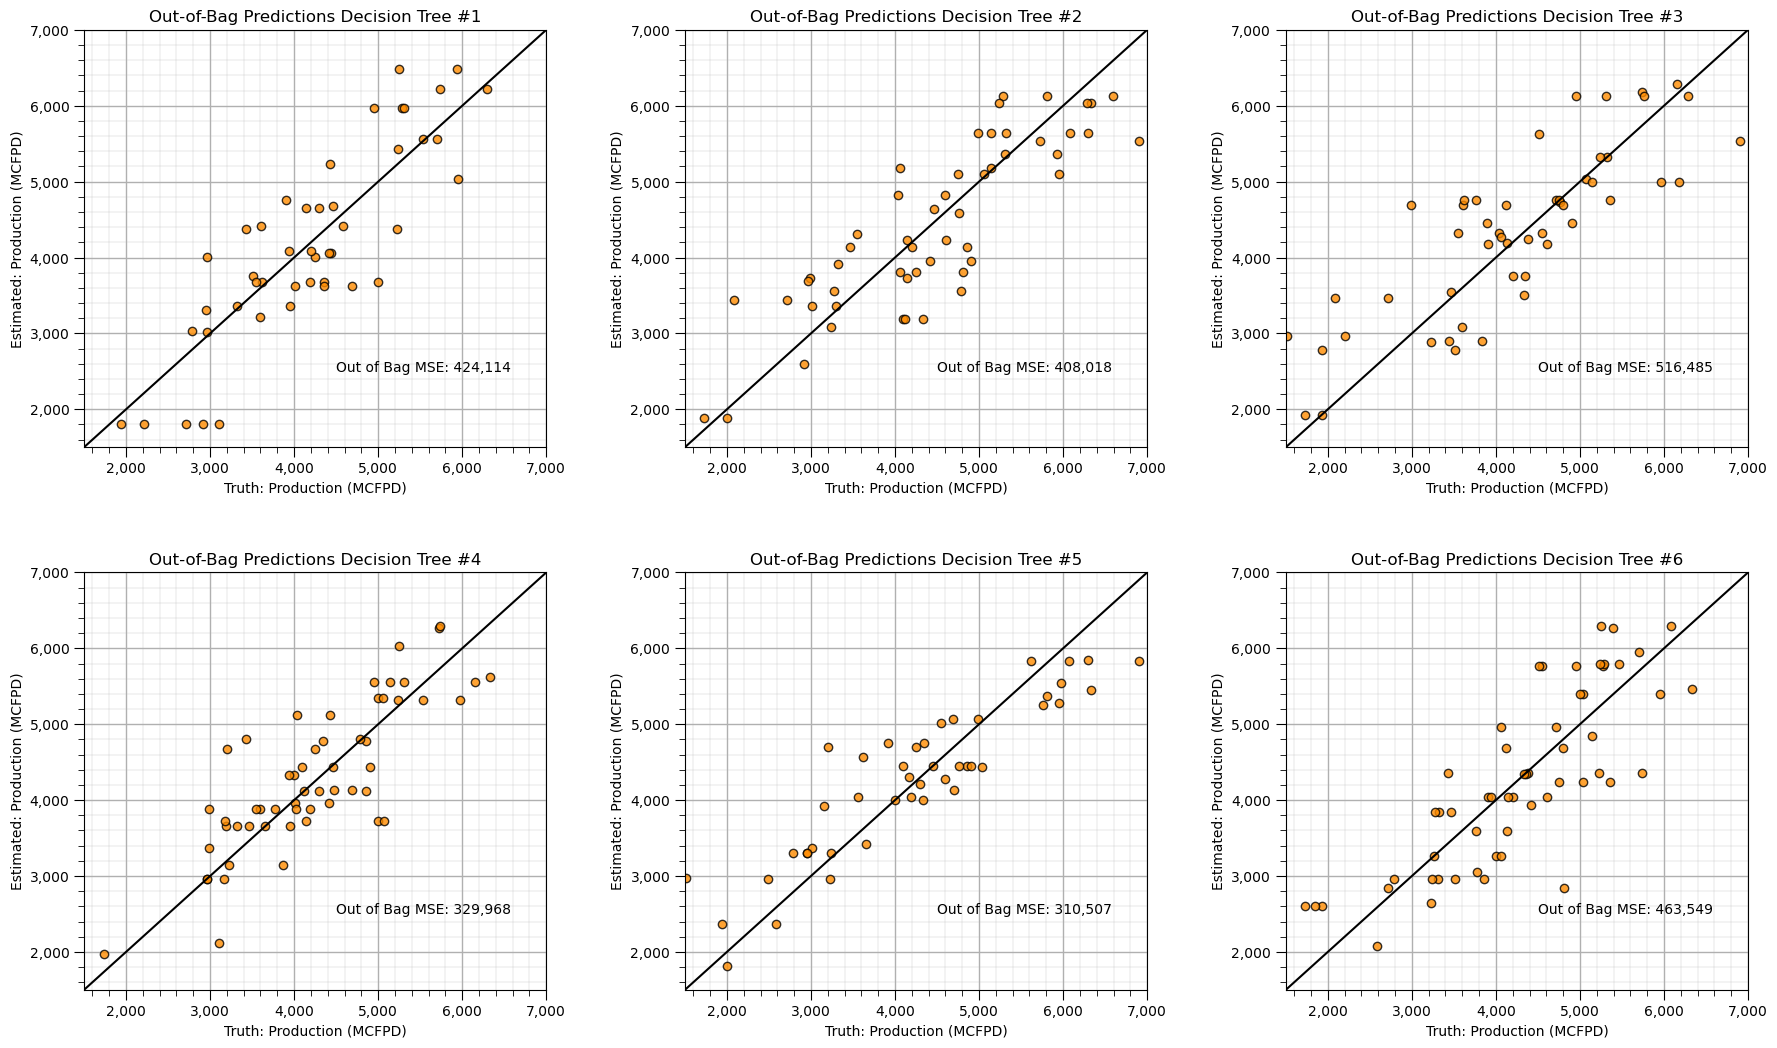

In [25]:
index = 1
for index in range(0,len(seeds)):                             # check models over random number seeds
    plt.subplot(2,3,index+1)
    check_model(bagging_models[index],y,ymin,ymax,ylabelunit,'Out-of-Bag Predictions Decision Tree #' +  str(index+1))
    index = index + 1
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.6, top=2.0, wspace=0.3, hspace=0.3)

Now let's demonstrate the averaging of the predictions over the 6 decision trees, we are performing bagging tree prediction by-hand to clearly demonstrate the method.
* we average the predicted response feature (production) over the discretized predictor feature space
* we can take advantage of broadcast methods for operations on entire arrays
* we will apply the same model check, but we will use a modified function to will read in the response feature 2D array, instead of a model

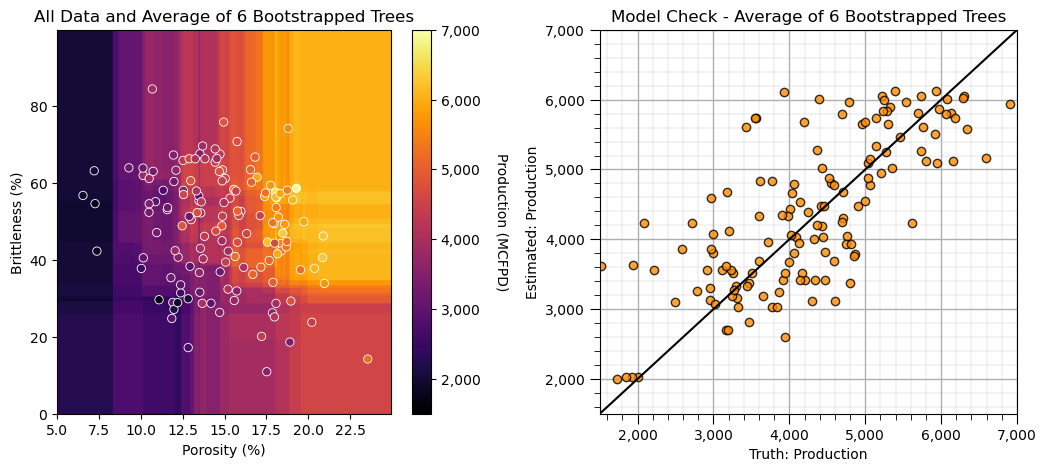

In [27]:
Z = pred[0] 
index = 1
for seed in seeds:                                            # loop over random number seeds
    if index == 1:
        Z = pred[index-1]
    else:
        Z = Z + pred[index-1]                                 # calculate the average response over 3 trees
    index = index + 1

Z = Z / len(seeds)                                            # grid pixel-wise average of the 6 bootstrapped decision trees
    
plt.subplot(121)                                              # plot predictions over predictor feature space
visualize_grid(Z,df[Xname[0]],Xmin[0],Xmax[0],df[Xname[1]],Xmin[1],Xmax[1],df[yname],ymin,ymax,ylabelunit,
               Xlabelunit[0],Xlabelunit[1],'All Data and Average of 6 Bootstrapped Trees')

plt.subplot(122)                                              # check model predictions vs. testing dataset
check_grid(Z,Xmin[0],Xmax[0],Xmin[1],Xmax[1],df[Xname[0]],df[Xname[1]],df[yname],ymin,ymax,'Model Check - Average of 6 Bootstrapped Trees')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.8, wspace=0.3, hspace=0.2)

We made 6 complicated trees, each trained with bootstrap resamples of the original data and then averaged the predictions from each.

* the result is more smooth - lower model variance 

* the result more closely matches the training data

#### Demonstration of Bagging with Increasing Number of Trees

For demonstration, let's build 6 bagging tree regression models with increasing number of overly complicated (and likely overfit) trees averaged.

* with the bagging regressor from scikit learn this is automated with the 'num_tree' hyperparameter

We will loop over the models and store each of them in an list of models again!

Completed of 6: 
1,  2,  3,  4,  5,  6,  

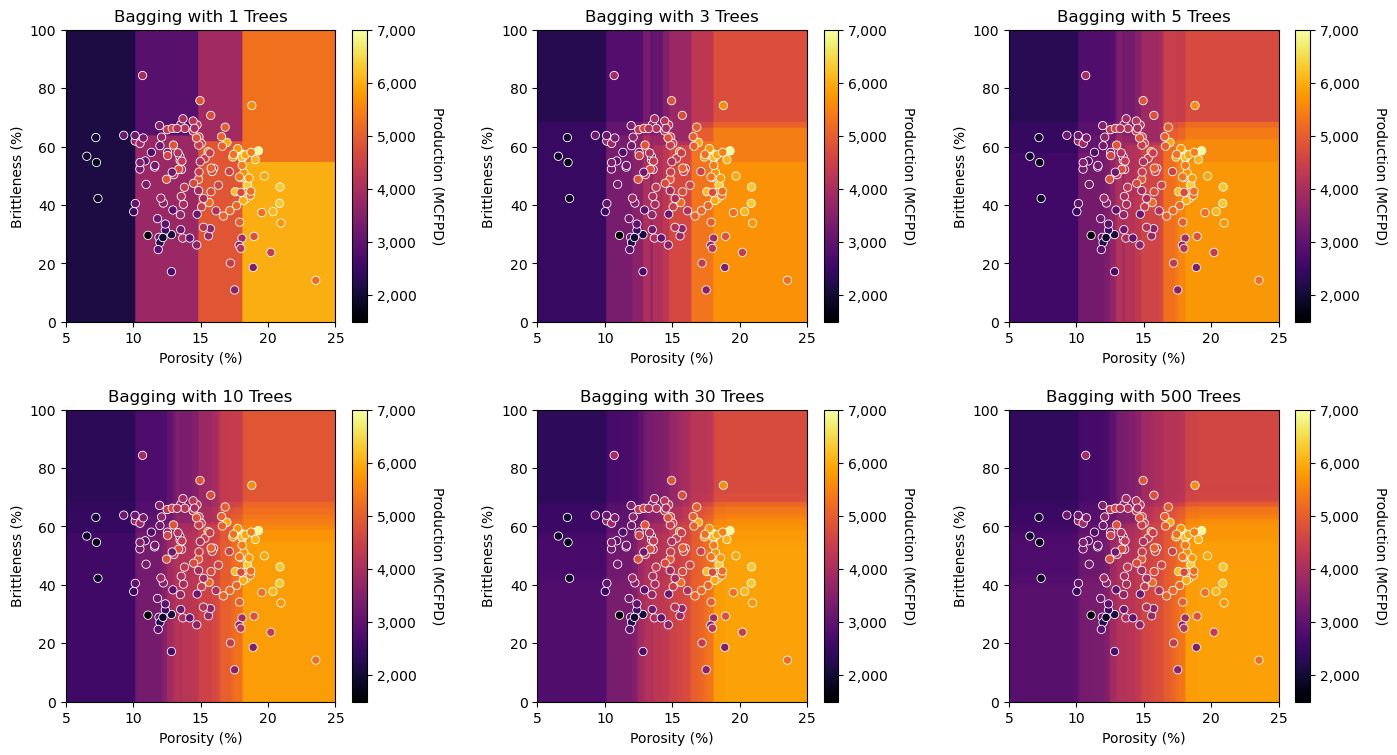

In [29]:
max_depth = 3; min_samples_leaf = 5                           # set for a complicated tree

regressor = DecisionTreeRegressor(max_depth = max_depth, min_samples_leaf = min_samples_leaf) # instantiate a decision tree

seed = 73073;
num_trees = [1,3,5,10,30,500]                                 # number of trees averaged for each estimator

bagging_models_ntrees = []; oob_MSE = []; pred = []

index = 1
print('Completed of 6: ')
for num_tree in num_trees:                                    # visualize the models over number of trees
    bagging_models_ntrees.append(BaggingRegressor(estimator=regressor,n_estimators=num_tree,random_state=seed,oob_score = True,n_jobs = 4))
    bagging_models_ntrees[index-1].fit(X = X, y = y)
    plt.subplot(2,3,index)
    pred.append(visualize_model(bagging_models_ntrees[index-1],df[Xname[0]],Xmin[0],Xmax[0],df[Xname[1]],Xmin[1],Xmax[1],df[yname],ymin,ymax,
                ylabelunit,Xlabelunit[0],Xlabelunit[1],'Bagging with ' + str(num_tree) + ' Trees'))
    print(str(index)+ ', ', end =" ")
    index = index + 1
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.4, wspace=0.4, hspace=0.3)

Observe the impact of averaging an increasing number of trees. 

* we transition from a discontinuous response prediction model to a continous model

Let's repeat the modeling cross validation step with the withheld testing data.

Completed of 6: 


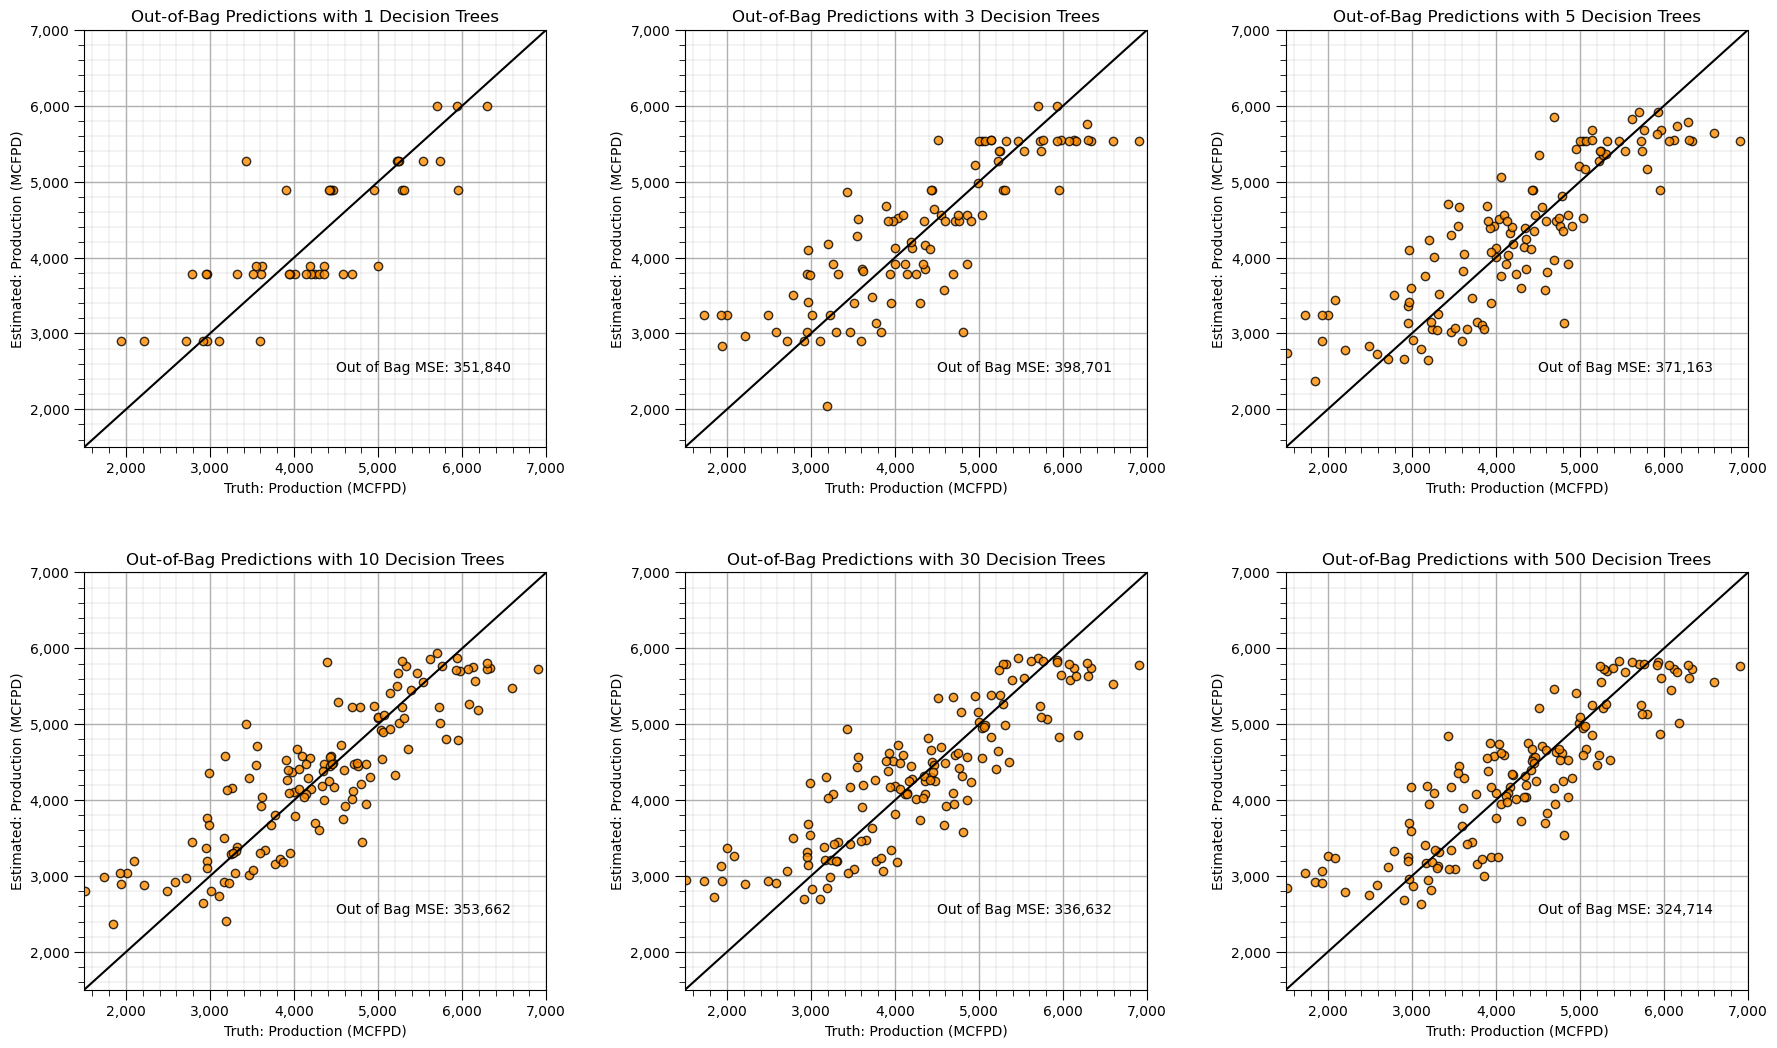

In [31]:
index = 1
print('Completed of 6: ')
for num_tree in num_trees:                                    # check models over number of trees
    plt.subplot(2,3,index)
    check_model_OOB_MSE(bagging_models_ntrees[index-1],y,ymin,ymax,ylabelunit,'Out-of-Bag Predictions with ' + 
                        str(num_trees[index-1]) + ' Decision Trees')
    index = index + 1
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.6, top=2.0, wspace=0.3, hspace=0.3)

See the improvement with testing accuracy with increasing level of ensemble model averaging?

Let's run many cases and check the accuracy vs. number of trees.

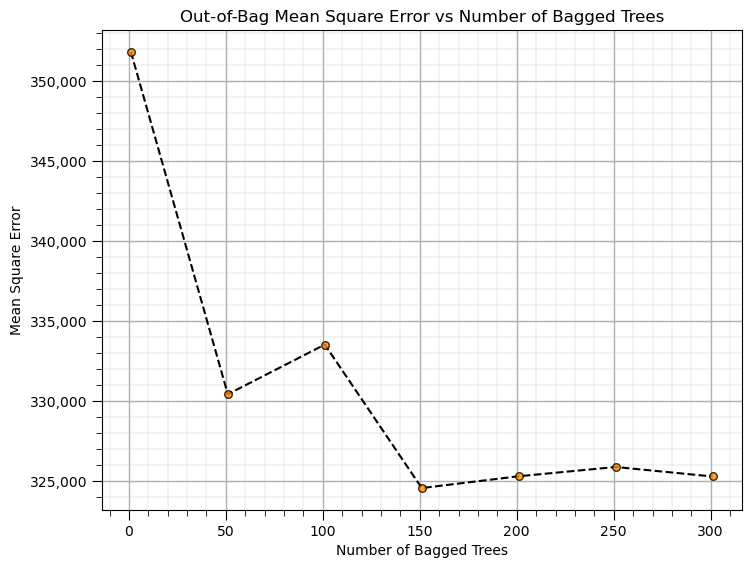

In [33]:
max_depth = 3; min_samples_leaf = 5                           # set for a complicated tree

regressor = DecisionTreeRegressor(max_depth = max_depth, min_samples_leaf = min_samples_leaf) # instantiate a decision tree
ntree_list = []; MSE_oob_list = []
for num_tree in np.arange(1,350,50):                          # check OOB MSE over number of trees
    bagg_tree = BaggingRegressor(estimator=regressor,n_estimators=num_tree,random_state=seed,oob_score = True,n_jobs = 4).fit(X = X, y = y)
    oob_y_hat = bagg_tree.oob_prediction_
    oob_y = y[oob_y_hat > 0.0]; oob_y_hat = oob_y_hat[oob_y_hat > 0.0]; # remove if not estimated
    MSE_oob_list.append(metrics.mean_squared_error(oob_y,oob_y_hat)); ntree_list.append(num_tree)

plt.scatter(ntree_list,MSE_oob_list,color='darkorange',edgecolor='black',alpha=0.8,s=30,zorder=10)
plt.plot(ntree_list,MSE_oob_list,color='black',ls='--',zorder=1)
plt.xlabel('Number of Bagged Trees'); plt.ylabel('Mean Square Error'); plt.title('Out-of-Bag Mean Square Error vs Number of Bagged Trees')
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format)); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

The number of trees improves model accuracy through reduction in model variance. Let's actually obseve this reduction in model variance with an experiment.

#### Model Variance vs. Ensemble Model Averaging

Let's see the change in model variance through model averaging, we will compare multiple models with different numbers of trees averaged.

* we accomplish this by visual comparison, let's look at different bagging modeling through changing the random number seed

Complete of 12:  1,  2,  3,  4,  5,  6,  7,  8,  9,  10,  11,  12,  

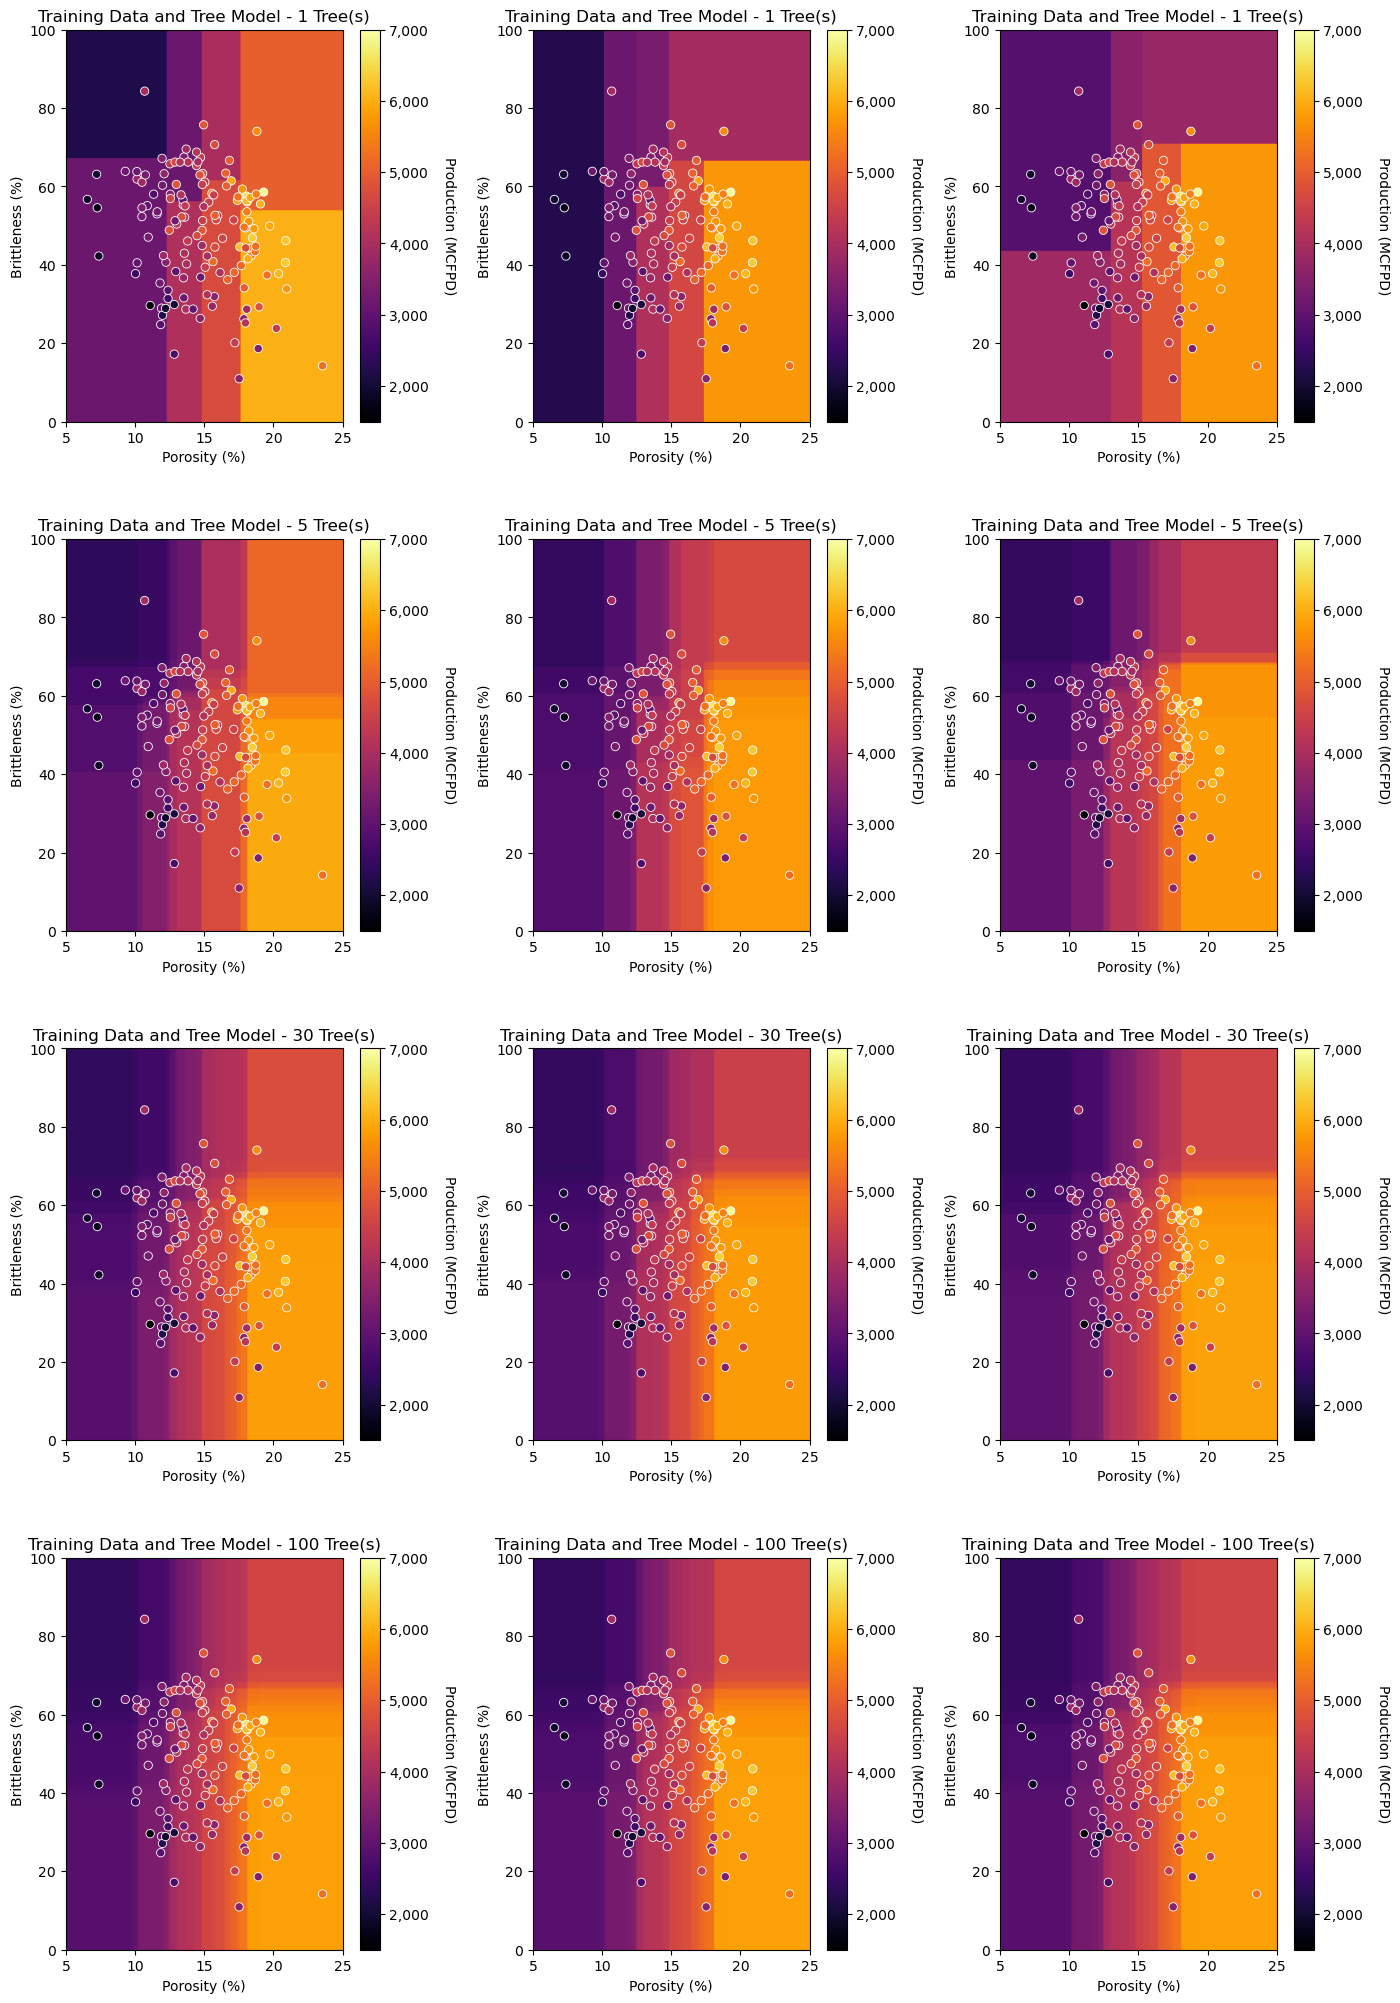

In [35]:
max_depth = 3; min_samples_leaf = 5                           # set for a complicated tree

regressor = DecisionTreeRegressor(max_depth = max_depth, min_samples_leaf = min_samples_leaf) # instantiate a decision tree

seeds = [73083, 73084, 73085]                                 # number of random number seeds
num_trees = [1,5,30,100]                                      # number of trees averaged for each estimator
bagging_models_ntrees_seeds = []
MSE_oob_list = []; ntree_list = []

index = 1
print('Complete of ' + str(len(seeds)*len(num_trees)) + ': ', end =" ")
for num_tree in num_trees:                                    # loop over number of trees
    for seed in seeds:                                        # loop over number of random number seeds
        bagg_tree = BaggingRegressor(estimator=regressor, n_estimators=num_tree, 
                                     random_state=seed, oob_score = True, n_jobs = 4).fit(X = X, y = y)
        oob_y_hat = bagg_tree.oob_prediction_
        oob_y = y[oob_y_hat > 0.0]; oob_y_hat = oob_y_hat[oob_y_hat > 0.0]; # remove if not estimated
        bagging_models_ntrees_seeds.append(bagg_tree)
        MSE_oob_list.append(metrics.mean_squared_error(oob_y,oob_y_hat)); ntree_list.append(num_tree)
        plt.subplot(4,3,index)
        visualize_model(bagging_models_ntrees_seeds[index-1],df[Xname[0]],Xmin[0],Xmax[0],df[Xname[1]],Xmin[1],Xmax[1],df[yname],ymin,ymax,
                ylabelunit,Xlabelunit[0],Xlabelunit[1],'Training Data and Tree Model - ' + str(num_tree) + ' Tree(s)')
        print(str(index)+ ', ', end =" ")
        index = index + 1
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=4.0, wspace=0.35, hspace=0.3); plt.show()

As we increase the number of decision trees averaged for the bagged tree regression models:

* once again, the response predictions over the predictor feature space gets more smooth

* the multiple realizations of the model start to converge, this is lower model variance

#### Random Forest

With random forest we limit the number of features considered for each split. Note, in scikit learn the default is $\frac{m}{3}$. Use this hyperparameter to set to square root of the number of predictor features. Another common alternative in practice $\sqrt{m}$.

```python
max_features = 'sqrt'
```
This forces tree diversity / decorrelates the trees.

* recall the model variance reduced by averaging over multiple decision trees $Y = \frac{1}{B} \sum_{b=1}^{B} Y^b(X_1^b,...,X_m^b)$

* recall from the [spatial bootstrap workflow](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_Spatial_Bootstrap.ipynb) that correlation of samples being averaged attenuates the variance reduction

Let's experiment with random forest to demonstrate this.  

1. Set the hyperparameters.

Even if I am just running one model, I set the random number seed to ensure I have a deterministic model, a model that can be rerun to get the same result everytime. If the random number seed is not set, then it is likely set based on the system time.

```python
seed = 73073
```

We will overfit the trees, let them grow overly complicated. Once again, the ensemble approach will mitigate model variance and overfit.

```python
max_depth = 5
```

We will use a large number of trees to mitigate model variance and to benefit from random forest tree diversity.

```python
num_tree = 300
```

We are using a simple 2 predictor feature example for ease of visualization.  The default for scikit learn's random forest is to select $\frac{m}{3}$  features at random for consideration for each split.  

This doesn't make much sense when $m = 2$, as with our case, so we set the maximum number of features considered for each split to 1.  

* We are forcing random selection of porosity or brittleness for consideration with each split, hierarchical binary segmentation.

```python
max_features = 1
```
2. Instantiate the random forest regressor with our hyperparameters  

```python
my_first_forest = RandomForestRegressor(max_depth=max_depth, random_state=seed,n_estimators=num_tree, max_features=max_features)
```

5. Train the random forest regression


```python
my_first_forest.fit(X = predictors, y = response)
```

6. Visualize the model result over the feature space (easy to do as we have only 2 predictor features)

Let's build, visualize and cross validate our first random forest regression model.

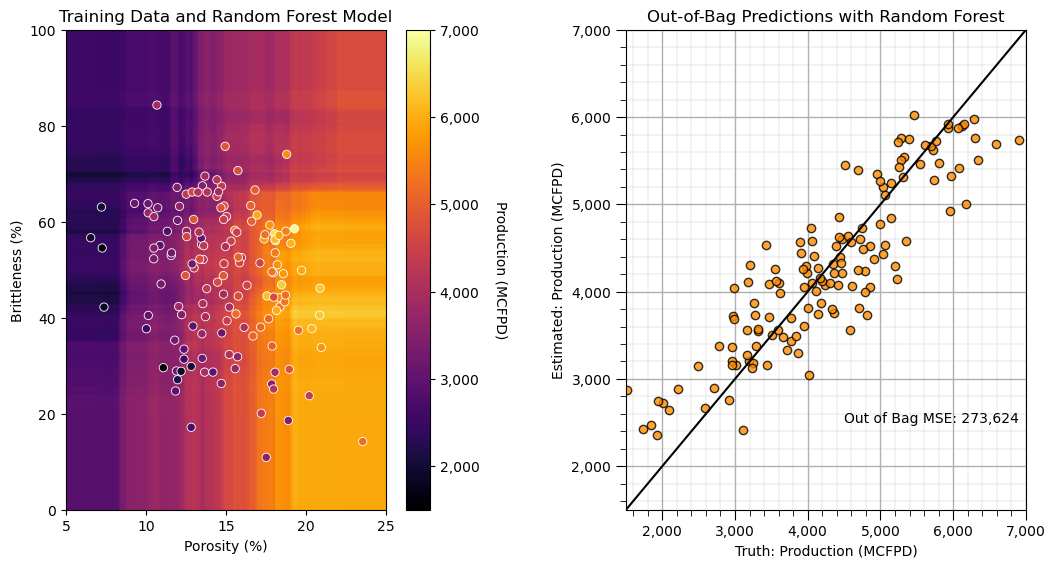

In [37]:
seed = 73093                                                  # set the random forest hyperparameters
max_depth = 7
num_tree = 300
max_features = 1

my_first_forest = RandomForestRegressor(max_depth=max_depth,random_state=seed,n_estimators=num_tree,max_features=max_features,
                                       oob_score=True,bootstrap=True)

my_first_forest.fit(X = X, y = y)                             # train the model with training data 

plt.subplot(121)                                              # predict with the model over the predictor feature space and visualize
visualize_model(my_first_forest,df[Xname[0]],Xmin[0],Xmax[0],df[Xname[1]],Xmin[1],Xmax[1],df[yname],ymin,ymax,
                ylabelunit,Xlabelunit[0],Xlabelunit[1],'Training Data and Random Forest Model')

plt.subplot(122)                                              # perform cross validation with withheld testing data
check_model_OOB_MSE(my_first_forest,y,ymin,ymax,ylabelunit,'Out-of-Bag Predictions with Random Forest')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.0, wspace=0.4, hspace=0.2); plt.show()

The power of tree diversity!  We just built our best model so far.  

* the conditional bias has decreased (our plot has a slope closer to 1:1)

* we have the lower out-of-bag mean score error

Let's run some tests to make sure we understand random forest regression model.

First let's confirm that only one feature (at random) is considered for each split

* limit ourselves to maximum depth = 1, only one split

* limit ourselves to a single tree in each forest!

This way we can see the diversity in the first splits over multiple models.

Complete of 6:  1,  2,  3,  4,  5,  6,  

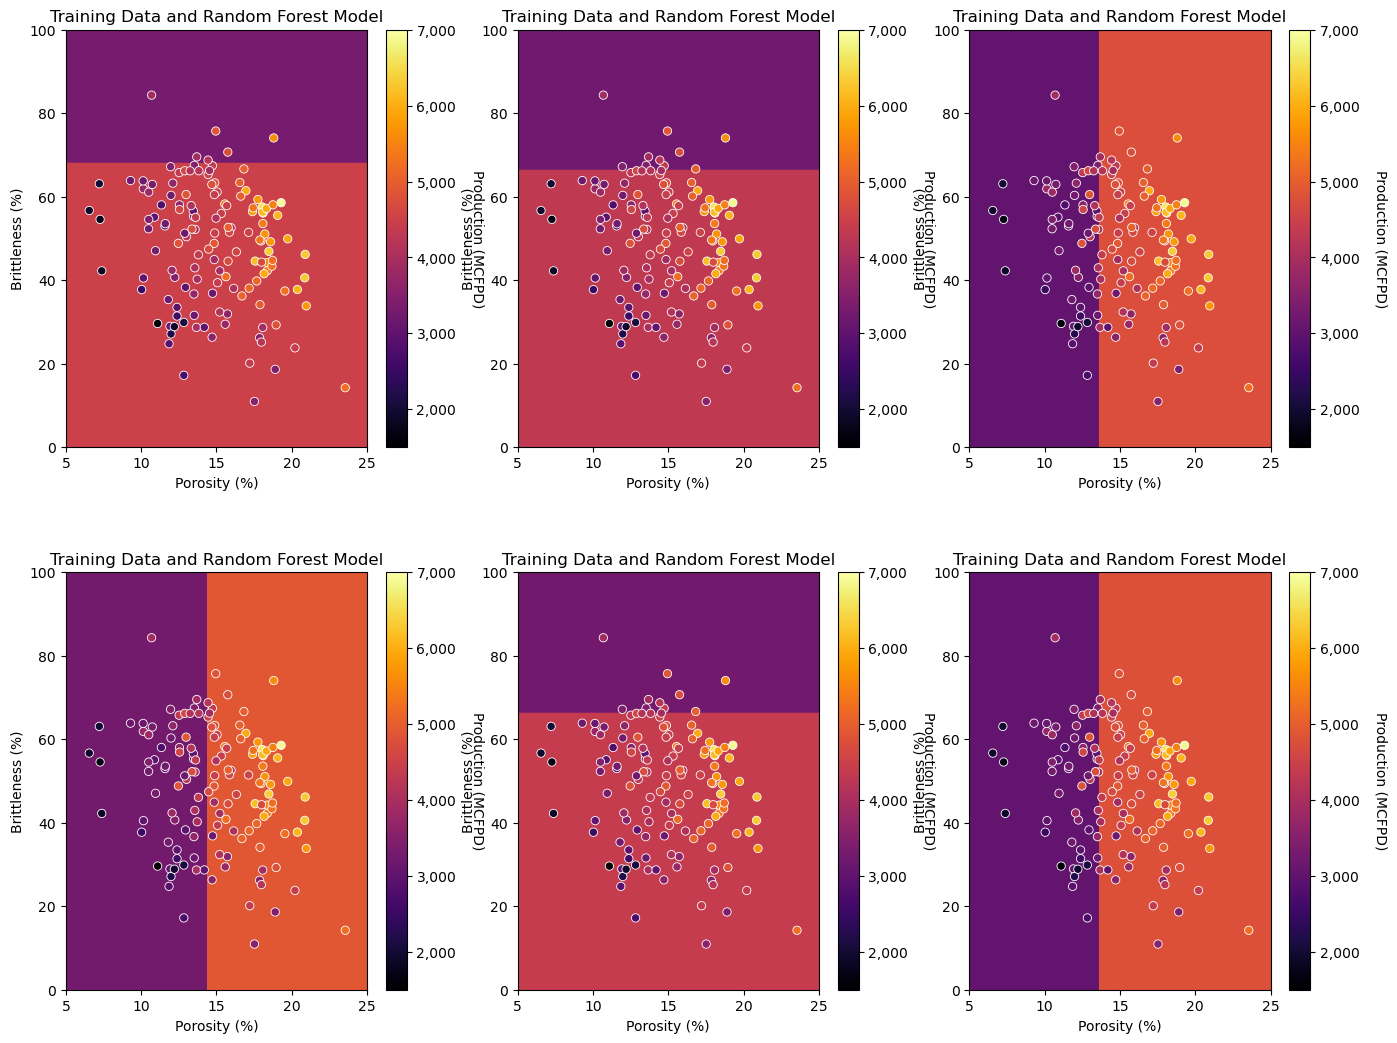

In [39]:
max_depth = 1                                                 # set the random forest hyperparameters
num_tree = 1
max_features = 1
simple_forest = []

seeds = [73103,73104,73105,73106,73107,73108]                 # set the random number seeds

index = 1
print('Complete of ' + str(len(seeds)) + ': ', end =" ")
for seed in seeds:                                            # loop over random number seeds
    simple_forest.append(RandomForestRegressor(max_depth=max_depth, random_state=seed,n_estimators=num_tree, max_features=max_features))
    simple_forest[index-1].fit(X = X, y = y)
    plt.subplot(2,3,index)                                    # predict with the model over the predictor feature space and visualize
    visualize_model(simple_forest[index-1],df[Xname[0]],Xmin[0],Xmax[0],df[Xname[1]],Xmin[1],Xmax[1],df[yname],ymin,ymax,
                ylabelunit,Xlabelunit[0],Xlabelunit[1],'Training Data and Random Forest Model')
    print(str(index)+ ', ', end =" ")
    index = index + 1
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.2, hspace=0.3)

Notice that the first splits are 50/50 porosity and brittleness.  

* aside, for all decision trees that I have fit to this dataset, porosity is always the feature selected for the first 2-3 levels of the tree.  

* the random forest has resulted in model diversity by limiting the predictor features under consideration for the first split!

Just incase you don't trust this, let's rerun the above code with both predictors allowed for all splits.

Complete of 6:  1,  2,  3,  4,  5,  6,  

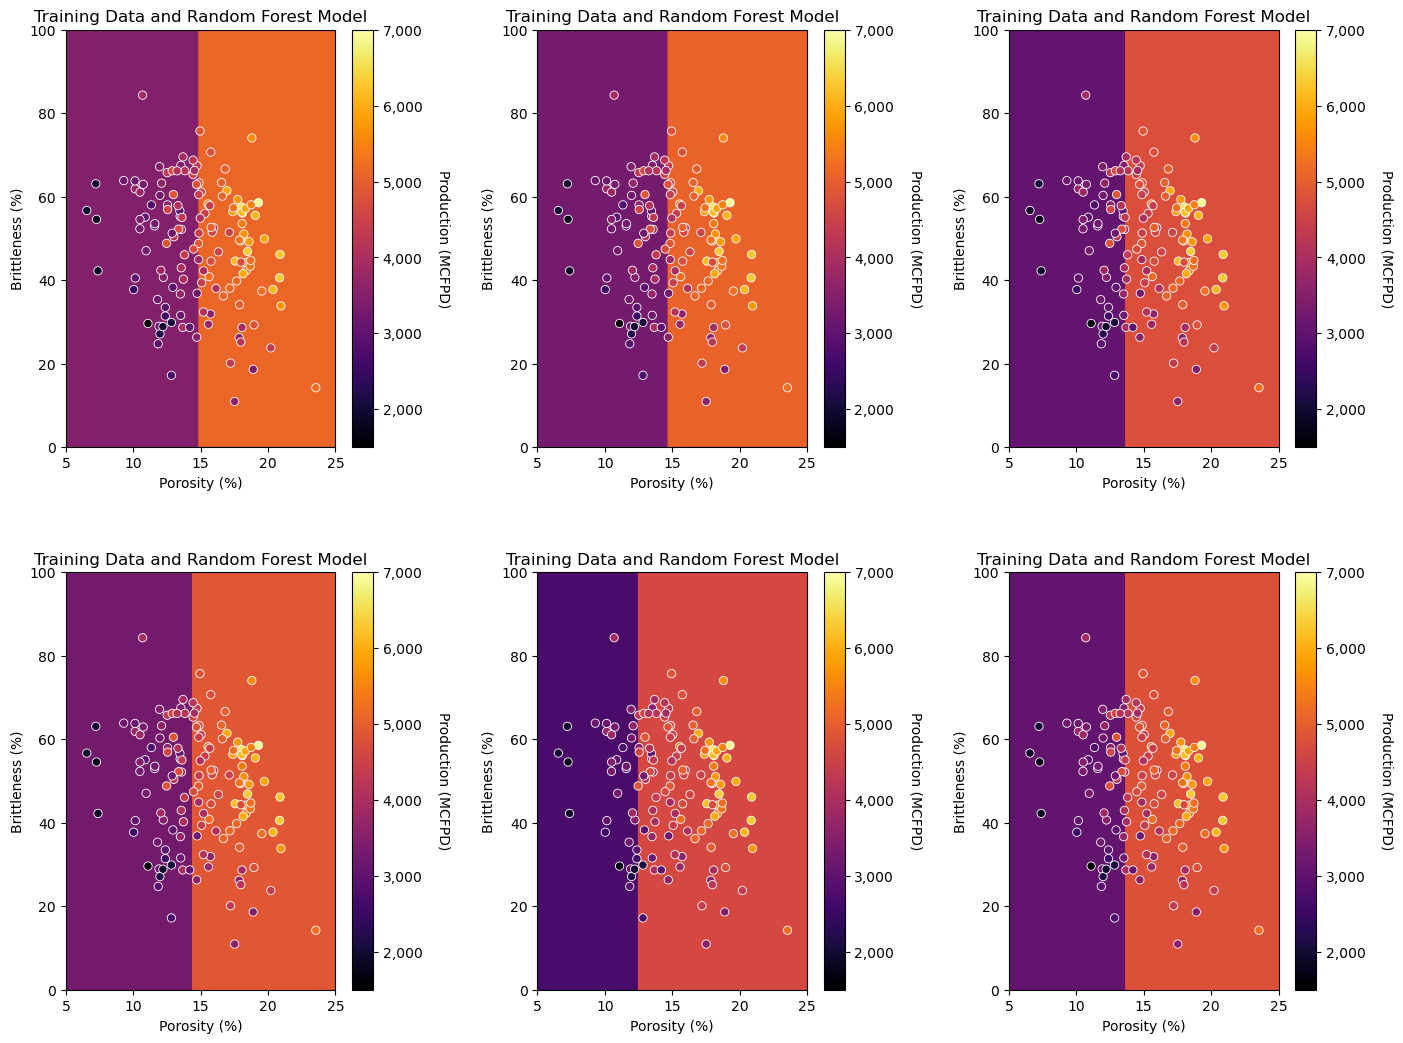

In [41]:
max_depth = 1                                                 # set the random forest hyperparameters
num_tree = 1
max_features = 2
simple_forest = []

seeds = [73103,73104,73105,73106,73107,73108]                 # random number seeds 

index = 1
print('Complete of ' + str(len(seeds)) + ': ', end =" ")
for seed in seeds:                                            # loop over random number seeds
    simple_forest.append(RandomForestRegressor(max_depth=max_depth, random_state=seed,n_estimators=num_tree, max_features=max_features))
    simple_forest[index-1].fit(X = X, y = y)
    plt.subplot(2,3,index)                                    # predict with the model over the predictor feature space and visualize
    visualize_model(simple_forest[index-1],df[Xname[0]],Xmin[0],Xmax[0],df[Xname[1]],Xmin[1],Xmax[1],df[yname],ymin,ymax,
                ylabelunit,Xlabelunit[0],Xlabelunit[1],'Training Data and Random Forest Model')
    print(str(index)+ ', ', end =" ")
    index = index + 1
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.4, hspace=0.3)

Now we have a set of first splits that vary (due to the bootstrap of the training data), but are all over porosity.

#### Model Performance by Out-of-Bag and Feature Importance

Since we are now building a more robust model with a large ensemble of trees, let's get more serious about model checking.

* we will look at out-of-bag mean square error

* we will look at feature importance

Let's start with a pretty big forest, this may take a while to run!

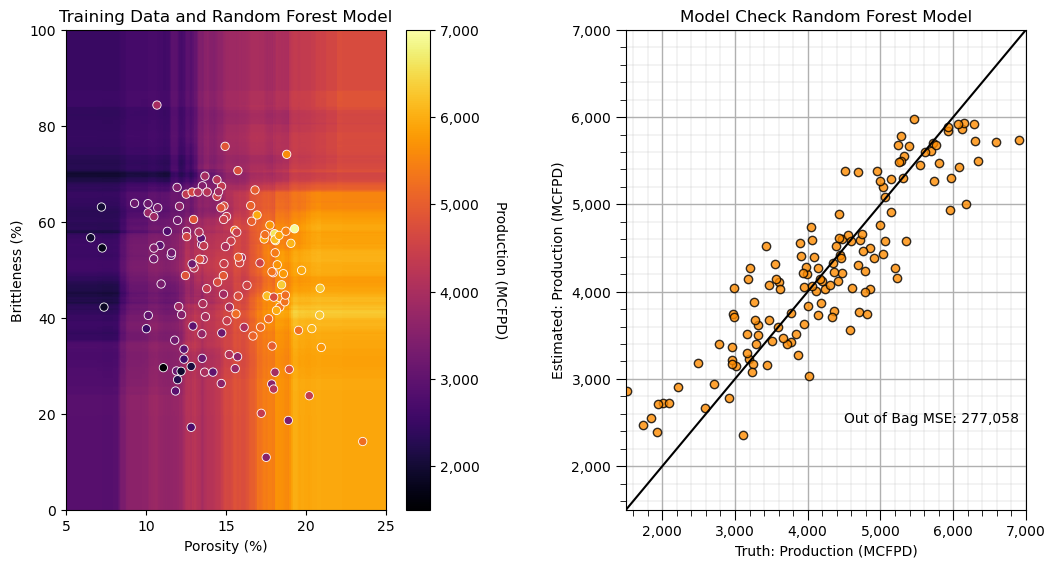

In [43]:
seed = 73093                                                  # set the random forest hyperparameters
max_depth = 7
num_tree = 500
max_features = 1

big_forest = RandomForestRegressor(max_depth=max_depth, random_state=seed,n_estimators=num_tree, max_features=max_features,
                                   oob_score = True,bootstrap=True,n_jobs = 4)

big_forest.fit(X = X, y = y)

plt.subplot(121)                                              # predict with the model over the predictor feature space and visualize
visualize_model(big_forest,df[Xname[0]],Xmin[0],Xmax[0],df[Xname[1]],Xmin[1],Xmax[1],df[yname],ymin,ymax,
                ylabelunit,Xlabelunit[0],Xlabelunit[1],'Training Data and Random Forest Model')

plt.subplot(122)                                              # perform cross validation with withheld testing data
check_model_OOB_MSE(big_forest,y,ymin,ymax,ylabelunit,'Model Check Random Forest Model')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.0, wspace=0.4, hspace=0.2)

To get the feature importance we just have to access the model member 'feature_importance_'.

* we had to set feature_importance to true in the model instantiation for this to be avaible

* this measure is standardized to sum to 1.0

* same order as the predictor features in the 2D array, porosity and then brittleness

* feature importance is the proportion of total MSE reduction through splits for each feature

* we can access the importance for each feature for each tree in the forest or the global average for each over the entire forest

We get the global average of feature importance with this member of the random forest regressor model.

````python
importances = big_forest.feature_importances_ 
````
Let's plot the feature improtance with significance calculated from the ensemble.

* when we report model-based feature importance, it is always a good idea to show that the model is a good model. I like to show a model check beside the feature importance result, in this case the out-of-bag cross validation plot and mean square error. 

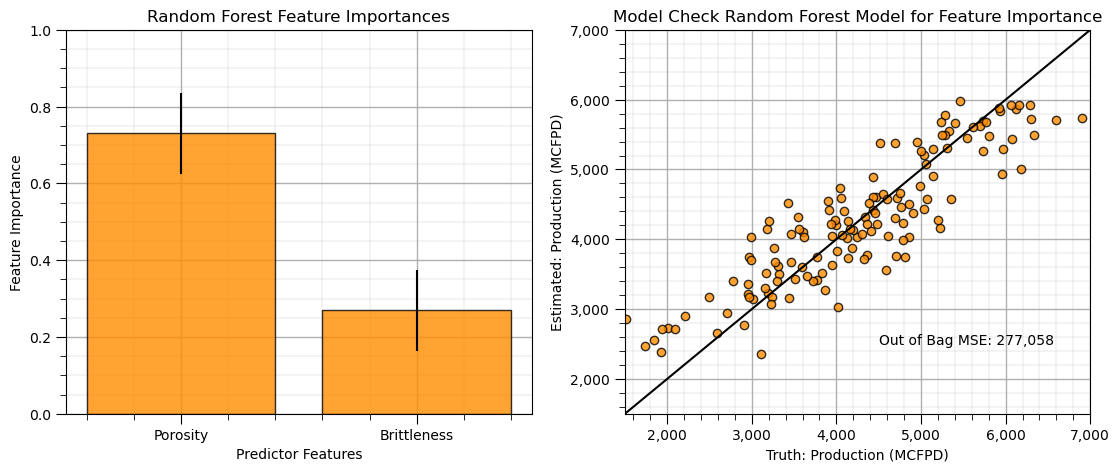

In [45]:
importances = big_forest.feature_importances_                 # expected (global) importance over the forest fore each predictor feature
std = np.std([tree.feature_importances_ for tree in big_forest.estimators_],axis=0) # retrieve importance by tree
indices = np.argsort(importances)[::-1]                       # sort in descending feature importance
features = ['Porosity','Brittleness']                         # names or predictor features

plt.subplot(121)
plt.title("Random Forest Feature Importances")
plt.bar(features, importances[indices],color="darkorange", alpha = 0.8, edgecolor = 'black', yerr=std[indices], align="center")
plt.ylim(0,1), plt.xlabel('Predictor Features'); plt.ylabel('Feature Importance'); add_grid()

plt.subplot(122)                                              # perform cross validation with withheld testing data
check_model_OOB_MSE(big_forest,y,ymin,ymax,ylabelunit,'Model Check Random Forest Model for Feature Importance')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=0.8, wspace=0.2, hspace=0.2); plt.show()

Let's try some hyperparameter training with the out-of-bag mean square error measure from our forest.

Let's start with the number of trees in our forest.

Complete of 50:  1,  2,  3,  4,  5,  6,  7,  8,  9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  

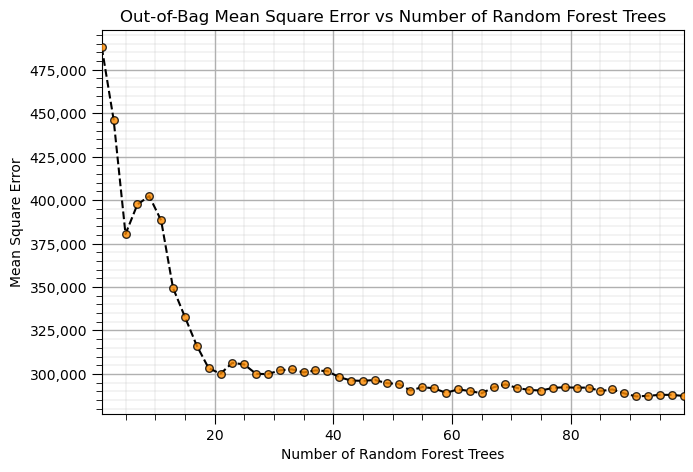

In [47]:
max_depth = 5                                                 # set the random forest hyperparameters
num_trees = np.arange(1,100,2)
max_features = 1
trained_forests = []
MSE_oob_list = []; ntree_list = []

index = 1
print('Complete of ' + str(len(num_trees)) + ': ', end =" ")
for num_tree in num_trees:                                     # loop over number of trees in our random forest
    trained_forest = RandomForestRegressor(max_depth=max_depth, random_state=seed,n_estimators=int(num_tree),
            oob_score = True,bootstrap=True,max_features=max_features).fit(X = X, y = y)
    trained_forests.append(trained_forest)
    oob_y_hat = trained_forest.oob_prediction_
    oob_y = y[oob_y_hat > 0.0]; oob_y_hat = oob_y_hat[oob_y_hat > 0.0]; # remove if not estimated
    MSE_oob_list.append(metrics.mean_squared_error(oob_y,oob_y_hat)); ntree_list.append(num_tree)
    print(str(index)+ ', ', end =" ")
    index = index + 1
    
plt.subplot(121)
plt.scatter(ntree_list,MSE_oob_list,color='darkorange',edgecolor='black',alpha=0.8,s=30,zorder=10)
plt.plot(ntree_list,MSE_oob_list,color='black',ls='--',zorder=1)
plt.xlabel('Number of Random Forest Trees'); plt.ylabel('Mean Square Error'); plt.title('Out-of-Bag Mean Square Error vs Number of Random Forest Trees')
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format)); add_grid(); plt.xlim([min(ntree_list),max(ntree_list)])
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.8, wspace=0.2, hspace=0.2); plt.show()

Now let's try the depth of the trees, given enough trees (we'll use 60 trees) as determined above.

Complete of 20:  1,  2,  3,  4,  5,  6,  7,  8,  9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  

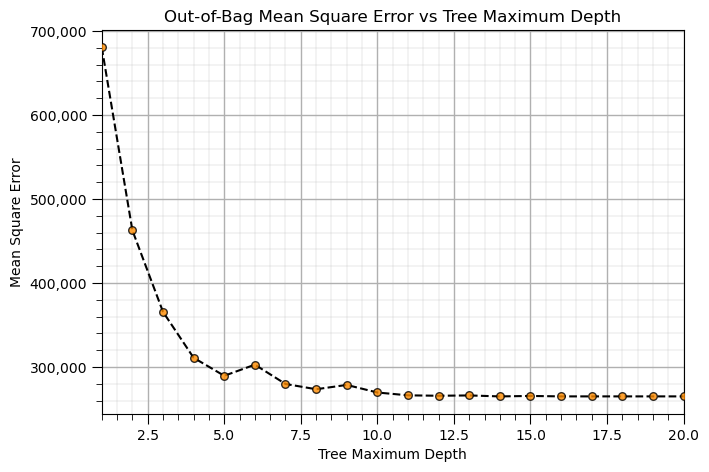

In [49]:
max_depths = np.linspace(1,20,20)                             # set the tree maximum tree depths to consider

num_tree = 60                                                 # set the random forest hyperparameters
max_features = 1
trained_forests = []
MSE_oob_list = []; max_depth_list = []

index = 1
print('Complete of ' + str(len(max_depths)) + ': ', end =" ")
for max_depth in max_depths:                                  # loop over tree depths    
    trained_forest = RandomForestRegressor(max_depth=int(max_depth), random_state=seed,n_estimators=num_tree,
            oob_score = True,bootstrap=True,max_features=max_features).fit(X = X, y = y)
    trained_forests.append(trained_forest)
    oob_y_hat = trained_forest.oob_prediction_
    oob_y = y[oob_y_hat > 0.0]; oob_y_hat = oob_y_hat[oob_y_hat > 0.0]; # remove if not estimated
    MSE_oob_list.append(metrics.mean_squared_error(oob_y,oob_y_hat)); max_depth_list.append(max_depth)
    print(str(index)+ ', ', end =" ")
    index = index + 1
    
plt.subplot(121)                                                # plot OOB MSE vs. maximum tree depth
plt.scatter(max_depth_list,MSE_oob_list,color='darkorange',edgecolor='black',alpha=0.8,s=30,zorder=10)
plt.plot(max_depth_list,MSE_oob_list,color='black',ls='--',zorder=1)
plt.xlabel('Tree Maximum Depth'); plt.ylabel('Mean Square Error'); plt.title('Out-of-Bag Mean Square Error vs Tree Maximum Depth')
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format)); add_grid(); plt.xlim([min(max_depth_list),max(max_depth_list)])
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.8, wspace=0.2, hspace=0.2); plt.show()

It looks like we need a maximum tree depth of atleast 10 for best performance of our model with respect to out-of-bag mean square error.

* note that our model is robust and resistant to overfit, the out-of-bag performance evaluation is close to monotonically increasing.

#### Machine Learning Pipelines for Clean, Compact Machine Learning Code

Pipelines are a scikit-learn class that allows for the encapsilation of a sequence of data preparation and modeling steps

* then we can treat the pipeline as an object in our much condensed workflow

The pipeline class allows us to:

* improve code readability and to keep everything straight

* build complete workflows with very few lines of readable code 

* avoid common workflow problems like data leakage, testing data informing model parameter training 

* abstract common machine learning modeling and focus on building the best model possible

The fundamental philosophy is to treat machine learning as a combinatorial search to find the best model (AutoML)

For more information see my recorded lecture on [Machine Learning Pipelines](https://www.youtube.com/watch?v=tYrPs8s1l9U&list=PLG19vXLQHvSAufDFgZEFAYQEwMJXklnQV&index=5) and a well-documented demonstration [Machine Learning Pipeline Workflow](http://localhost:8892/notebooks/OneDrive%20-%20The%20University%20of%20Texas%20at%20Austin/Courses/Workflows/PythonDataBasics_Pipelines.ipynb).

In [51]:
x1 = 0.25; x2 = 0.3                                           # predictor values for the prediction

pipe_forest = Pipeline([                                      # the machine learning workflow as a pipeline object
    ('forest', RandomForestRegressor())
])

params = {                                                    # the machine learning workflow method's parameters to search
    'forest__max_leaf_nodes': np.arange(2,100,2,dtype = int),
}

tuned_forest = GridSearchCV(pipe_forest,params,scoring = 'neg_mean_squared_error', # hyperparameter tuning w. grid seach k-fold cross validation 
                             refit = True)
tuned_forest.fit(X,y)                                         # fit model with tuned hyperparameters to all the data

print('Tuned hyperparameter: max_leaf_nodes = ' + str(tuned_forest.best_params_))

estimate = tuned_forest.predict([[x1,x2]])[0]                 # make a prediction (no tuning shown)
print('Estimated ' + ylabel + ' for ' + Xlabel[0] + ' = ' + str(x1) + ' and ' + Xlabel[1] + ' = ' + str(x2)  + ' is ' + 
      str(round(estimate,1)) + ' ' + yunit) # print results

Tuned hyperparameter: max_leaf_nodes = {'forest__max_leaf_nodes': 64}
Estimated Production for Porosity = 0.25 and Brittleness = 0.3 is 2001.2 MCFPD


#### Comments

I hope you found this tutorial useful. I'm always happy to discuss geostatistics, statistical modeling, uncertainty modeling and machine learning,

*Michael*

#### The Author:

### Michael Pyrcz, Professor, The University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig) | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)  